In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore') 
from pylab import rcParams
rcParams["figure.figsize"]=30,16

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_excel("/content/drive/MyDrive/LCF_Internal/Renewable_Model/EDA Approach-1/XGBoost Implementation/v11/v11_3.xlsx",sheet_name = 'ren_ln_orig')
data.head()

,OpportunityID_ren,accountnumber,OpportunityID,lnlexidsele,inputcheckbusname,inputcheckbusaltname,inputcheckbusaddr,inputcheckbuscity,inputcheckbusstate,inputcheckbuszip,...,model1rc5,model1rc6,model2name,model2score,model2rc1,model2rc2,model2rc3,model2rc4,model2rc5,model2rc6
0,0062M00000gYqZQQA0,LCFLN202208126653,0062M00000gYqZQQA0,1.069630e+08,1.0,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,SLBO1702_0_2,560.0,B078,B026,B063,B074,NaN,NaN
1,0062M00000gYSpGQAW,LCFLN202208126658,0062M00000gYSpGQAW,5.004454e+07,1.0,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,SLBO1702_0_2,723.0,B069,B063,B031,B066,NaN,NaN
2,0062M00000gYsQcQAK,LCFLN202208126659,0062M00000gYsQcQAK,9.550183e+10,1.0,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,SLBO1702_0_2,702.0,B034,B052,B036,B037,NaN,NaN
3,0062M00000n0BEfQAM,LCFLN202208130965,0062M00000n0BEfQAM,1.619373e+08,1.0,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,SLBO1702_0_2,562.0,B078,B026,B074,B063,NaN,NaN
4,0062M00000gYTaCQAW,LCFLN202208126663,0062M00000gYTaCQAW,2.354679e+07,1.0,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,SLBO1702_0_2,573.0,B063,B026,B078,B074,NaN,NaN


In [ ]:
wo = pd.read_excel("/content/drive/MyDrive/LCF_Internal/Renewable_Model/EDA Approach-1/XGBoost Implementation/v11/v11_3.xlsx",sheet_name = 'Ren_orig')

In [ ]:
wo.columns

Index(['OpportunityID', 'CreatedDate', 'FundedDate', 'OpportunityName',
       'Priordeal_OppID', 'Renewal_PreviousCollectionStatus',
       'Renewal_PreviousPace', 'Renewal_PreviousPaidPercentageOfRTR',
       'Renewal_PreviousCreditScore', 'Renewal_CountPreviousDeals',
       'Renewal_PreviousCountBounces', 'Renewal_PreviousPosition',
       'Renewal_PreviousHBwLCF', 'Renewal_PreviousHBwoLCF',
       'Renewal_PreviousAvgMonthRevenue', 'Renewal_PreviousAvgDailyBalance',
       'Renewal_TwoWeekBounces', 'NumberOfBankStatements',
       'Last3Months_MA_OverdraftDays', 'Last3Months_MA_NumReturnItems',
       'Last3Months_Sum_NumReturnItems', 'LastBankStatement_OverdraftDays',
       'Last3Months_MA_AdjustedMonthlyDeposits',
       'Last3Months_MA_AvgDailyBalance', 'Credit_Score__c',
       'Time_in_Business__c', 'Is_this_Business_home_based__c',
       'BBC_Position__c', 'HB_with_LCF_Payment__c', 'HBwoLCF',
       'Contract_HoldBack__c', 'Last3Statments_MA_AdjustedMonthlyDeposits',
     

In [ ]:
wo = wo[['OpportunityID','WriteOff_YN']]

In [ ]:
wo

,OpportunityID,WriteOff_YN
0,0062M00000mTGVnQAO,1.0
1,0062M00000o96yhQAA,0.0
2,0062M00000mfz6iQAA,0.0
3,0062M00000lVi6gQAC,0.0
4,0062M00000mg31dQAA,0.0
...,...,...
3534,0062M00000oY7fdQAC,1.0
3535,0062M00000bmKPLQA2,1.0
3536,0062M00000bmhkAQAQ,1.0
3537,0062M00000lWtjxQAC,0.0


In [ ]:
d = pd.merge(data, wo, on="OpportunityID")

In [ ]:
d

,OpportunityID_ren,accountnumber,OpportunityID,lnlexidsele,inputcheckbusname,inputcheckbusaltname,inputcheckbusaddr,inputcheckbuscity,inputcheckbusstate,inputcheckbuszip,...,model1rc6,model2name,model2score,model2rc1,model2rc2,model2rc3,model2rc4,model2rc5,model2rc6,WriteOff_YN
0,0062M00000gYqZQQA0,LCFLN202208126653,0062M00000gYqZQQA0,1.069630e+08,1.0,0.0,1.0,1.0,1.0,1.0,...,NaN,SLBO1702_0_2,560.0,B078,B026,B063,B074,NaN,NaN,0.0
1,0062M00000gYSpGQAW,LCFLN202208126658,0062M00000gYSpGQAW,5.004454e+07,1.0,0.0,1.0,1.0,1.0,1.0,...,NaN,SLBO1702_0_2,723.0,B069,B063,B031,B066,NaN,NaN,0.0
2,0062M00000gYsQcQAK,LCFLN202208126659,0062M00000gYsQcQAK,9.550183e+10,1.0,0.0,1.0,1.0,1.0,1.0,...,NaN,SLBO1702_0_2,702.0,B034,B052,B036,B037,NaN,NaN,0.0
3,0062M00000n0BEfQAM,LCFLN202208130965,0062M00000n0BEfQAM,1.619373e+08,1.0,0.0,1.0,1.0,1.0,1.0,...,NaN,SLBO1702_0_2,562.0,B078,B026,B074,B063,NaN,NaN,0.0
4,0062M00000gYTaCQAW,LCFLN202208126663,0062M00000gYTaCQAW,2.354679e+07,1.0,0.0,1.0,1.0,1.0,1.0,...,NaN,SLBO1702_0_2,573.0,B063,B026,B078,B074,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3377,0062M00000lTxv8QAC,LCFLN202208129165,0062M00000lTxv8QAC,1.197487e+11,1.0,0.0,1.0,1.0,1.0,1.0,...,NaN,SLBO1702_0_2,659.0,B026,B069,B066,B070,NaN,NaN,0.0
3378,0062M00000lTxyLQAS,LCFLN202208129166,0062M00000lTxyLQAS,1.342359e+11,1.0,0.0,1.0,1.0,1.0,1.0,...,NaN,SLBO1702_0_2,688.0,B034,B069,B037,B036,NaN,NaN,0.0
3379,0062M00000jzsJkQAI,LCFLN202208128064,0062M00000jzsJkQAI,6.488768e+10,1.0,0.0,1.0,1.0,1.0,1.0,...,NaN,SLBO1702_0_2,711.0,B017,B066,B052,B036,NaN,NaN,1.0
3380,0062M00000l01oMQAQ,LCFLN202208128630,0062M00000l01oMQAQ,1.368324e+11,1.0,0.0,1.0,1.0,1.0,1.0,...,NaN,SLBO1702_0_2,222.0,B068,NaN,NaN,NaN,NaN,NaN,1.0


In [ ]:
data = d.copy()

In [ ]:
data['b2bactv1pdpdbaltot'].value_counts()

-99998.0    2207
-99999.0     508
 0.0         279
 8003.0        7
 1743.0        7
            ... 
 99896.0       1
 294.0         1
 284.0         1
 2243.0        1
 350.0         1
Name: b2bactv1pdpdbaltot, Length: 321, dtype: int64

In [ ]:
data['b2bactv1pdpdbaltotgrow1y'].value_counts()

-99998.0000    2530
-99999.0000     508
-99997.0000     131
 0.0000          38
 1.0000          29
               ... 
 1.9674           1
 1.9400           1
 0.9809           1
 1.4455           1
 1.2281           1
Name: b2bactv1pdpdbaltotgrow1y, Length: 149, dtype: int64

In [ ]:
data.to_excel("/content/drive/MyDrive/LCF_Internal/Renewable_Model/EDA Approach-1/XGBoost Implementation/v11/v11_4.xlsx",sheet_name = 'Ren_ln_orig')

## Analysing b2bactv1pdpdbaltot

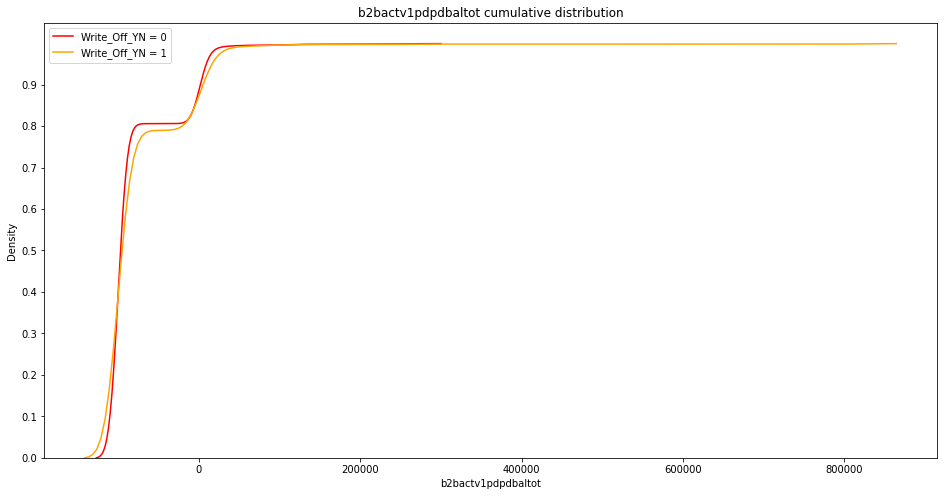

In [ ]:
plt.figure(figsize = (16,8))

sns.kdeplot(data = data[data['WriteOff_YN']==0]['b2bactv1pdpdbaltot'], cumulative = True, label = "Write_Off_YN = 0",color = 'red')
sns.kdeplot(data = data[data['WriteOff_YN']==1]['b2bactv1pdpdbaltot'], cumulative = True, label = "Write_Off_YN = 1",color = 'orange')
# plt.xticks(np.arange(0,900,50))
plt.yticks(np.arange(0,1,0.1))
plt.title('b2bactv1pdpdbaltot cumulative distribution')
plt.legend()

In [ ]:
b2b1 = pd.DataFrame({'b2bactv1pdpdbaltot':data['b2bactv1pdpdbaltot'],'WriteOff_YN':data['WriteOff_YN']})

In [ ]:
b2b1

,b2bactv1pdpdbaltot,WriteOff_YN
0,293.0,0.0
1,0.0,0.0
2,-99998.0,0.0
3,-99998.0,0.0
4,-99998.0,1.0
...,...,...
3377,-99998.0,0.0
3378,-99998.0,0.0
3379,-99998.0,1.0
3380,-99999.0,1.0


In [ ]:
b2b1[b2b1['b2bactv1pdpdbaltot']<=0]['b2bactv1pdpdbaltot'].unique()

array([     0., -99998., -99999.])

In [ ]:
b2b1['flag'] = b2b1['b2bactv1pdpdbaltot'].apply(lambda x: 1 if x<0 else 0)

In [ ]:
b2b1['flag'].value_counts()

1    2715
0     667
Name: flag, dtype: int64

In [ ]:
b2b1

,b2bactv1pdpdbaltot,WriteOff_YN,flag
0,293.0,0.0,0
1,0.0,0.0,0
2,-99998.0,0.0,1
3,-99998.0,0.0,1
4,-99998.0,1.0,1
...,...,...,...
3377,-99998.0,0.0,1
3378,-99998.0,0.0,1
3379,-99998.0,1.0,1
3380,-99999.0,1.0,1


In [ ]:
b2b1['value'] = b2b1['b2bactv1pdpdbaltot'].apply(lambda x:-1 if x<0 else x)

In [ ]:
b2b1['value'].value_counts()

-1.0        2715
 0.0         279
 8003.0        7
 1743.0        7
 5720.0        6
            ... 
 99896.0       1
 294.0         1
 284.0         1
 2243.0        1
 350.0         1
Name: value, Length: 320, dtype: int64

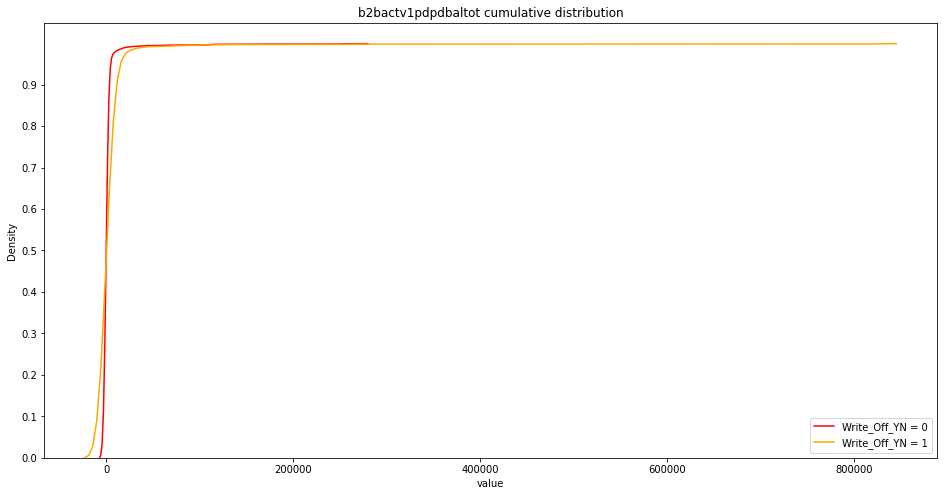

In [ ]:
plt.figure(figsize = (16,8))

sns.kdeplot(data = b2b1[b2b1['WriteOff_YN']==0]['value'], cumulative = True, label = "Write_Off_YN = 0",color = 'red')
sns.kdeplot(data = b2b1[b2b1['WriteOff_YN']==1]['value'], cumulative = True, label = "Write_Off_YN = 1",color = 'orange')
# plt.xticks(np.arange(0,900,50))
plt.yticks(np.arange(0,1,0.1))
plt.title('b2bactv1pdpdbaltot cumulative distribution')
plt.legend()

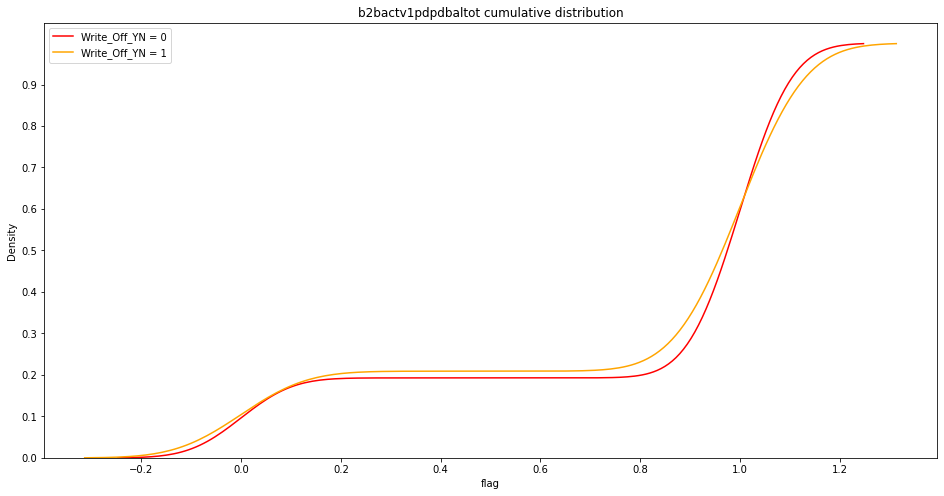

In [ ]:
plt.figure(figsize = (16,8))

sns.kdeplot(data = b2b1[b2b1['WriteOff_YN']==0]['flag'], cumulative = True, label = "Write_Off_YN = 0",color = 'red')
sns.kdeplot(data = b2b1[b2b1['WriteOff_YN']==1]['flag'], cumulative = True, label = "Write_Off_YN = 1",color = 'orange')
# plt.xticks(np.arange(0,900,50))
plt.yticks(np.arange(0,1,0.1))
plt.title('b2bactv1pdpdbaltot cumulative distribution')
plt.legend()

In [ ]:
data.corr()['WriteOff_YN']['b2bactv1pdpdbaltot']

0.02805054004693779

In [ ]:
b2b1.corr()['WriteOff_YN']['value']

0.03231467895026405

## Analysing b2bactv1pdpdbaltotgrow1y

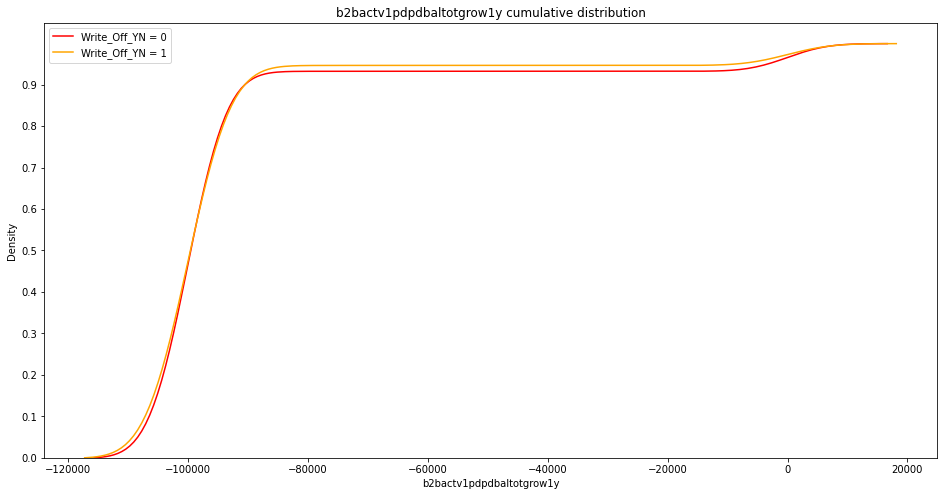

In [ ]:
plt.figure(figsize = (16,8))

sns.kdeplot(data = data[data['WriteOff_YN']==0]['b2bactv1pdpdbaltotgrow1y'], cumulative = True, label = "Write_Off_YN = 0",color = 'red')
sns.kdeplot(data = data[data['WriteOff_YN']==1]['b2bactv1pdpdbaltotgrow1y'], cumulative = True, label = "Write_Off_YN = 1",color = 'orange')
# plt.xticks(np.arange(0,900,50))
plt.yticks(np.arange(0,1,0.1))
plt.title('b2bactv1pdpdbaltotgrow1y cumulative distribution')
plt.legend()

In [ ]:
b2b2 = data[['b2bactv1pdpdbaltotgrow1y','WriteOff_YN']]
b2b2

,b2bactv1pdpdbaltotgrow1y,WriteOff_YN
0,4.5077,0.0
1,-99997.0000,0.0
2,-99998.0000,0.0
3,-99998.0000,0.0
4,-99998.0000,1.0
...,...,...
3377,-99998.0000,0.0
3378,-99998.0000,0.0
3379,-99998.0000,1.0
3380,-99999.0000,1.0


In [ ]:
b2b2['b2bactv1pdpdbaltotgrow1y'].max()

965.0

In [ ]:
b2b2[b2b2['b2bactv1pdpdbaltotgrow1y']<=0]['b2bactv1pdpdbaltotgrow1y'].unique()

array([-99997., -99998., -99999.,      0.])

In [ ]:
b2b2['flag'] = b2b2['b2bactv1pdpdbaltotgrow1y'].apply(lambda x: 1 if x<0 else 0)

In [ ]:
b2b2['flag'].value_counts()

1    3169
0     213
Name: flag, dtype: int64

In [ ]:
b2b2

,b2bactv1pdpdbaltotgrow1y,WriteOff_YN,flag
0,4.5077,0.0,0
1,-99997.0000,0.0,1
2,-99998.0000,0.0,1
3,-99998.0000,0.0,1
4,-99998.0000,1.0,1
...,...,...,...
3377,-99998.0000,0.0,1
3378,-99998.0000,0.0,1
3379,-99998.0000,1.0,1
3380,-99999.0000,1.0,1


In [ ]:
b2b2['value'] = b2b2['b2bactv1pdpdbaltotgrow1y'].apply(lambda x:-1 if x<0 else x)

In [ ]:
b2b2['value'].value_counts()

-1.0000    3169
 0.0000      38
 1.0000      29
 2.0000       2
 8.0193       2
           ... 
 1.9674       1
 1.9400       1
 0.9809       1
 1.4455       1
 1.2281       1
Name: value, Length: 147, dtype: int64

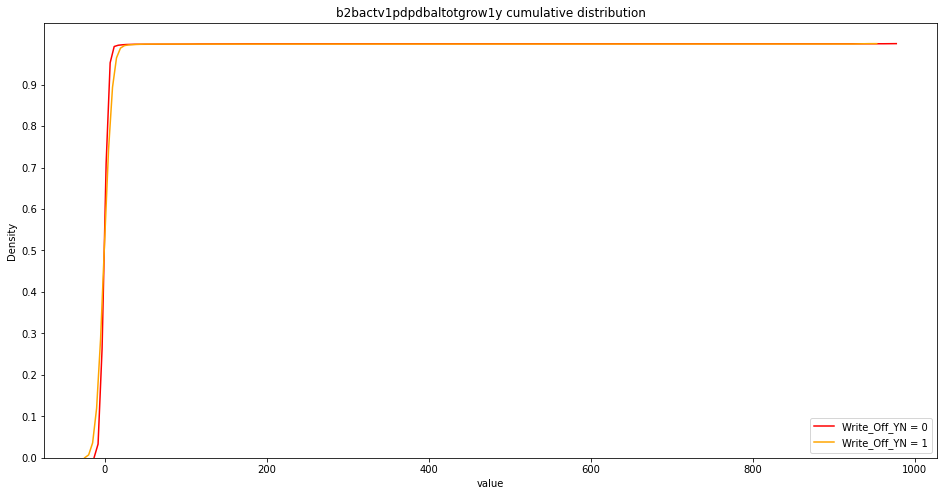

In [ ]:
plt.figure(figsize = (16,8))

sns.kdeplot(data = b2b2[b2b2['WriteOff_YN']==0]['value'], cumulative = True, label = "Write_Off_YN = 0",color = 'red')
sns.kdeplot(data = b2b2[b2b2['WriteOff_YN']==1]['value'], cumulative = True, label = "Write_Off_YN = 1",color = 'orange')
# plt.xticks(np.arange(0,900,50))
plt.yticks(np.arange(0,1,0.1))
plt.title('b2bactv1pdpdbaltotgrow1y cumulative distribution')
plt.legend()

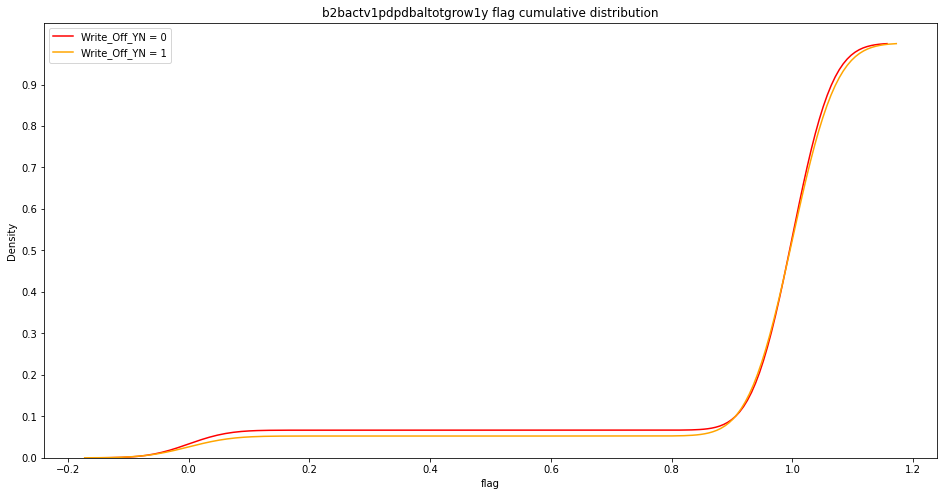

In [ ]:
plt.figure(figsize = (16,8))

sns.kdeplot(data = b2b2[b2b2['WriteOff_YN']==0]['flag'], cumulative = True, label = "Write_Off_YN = 0",color = 'red')
sns.kdeplot(data = b2b2[b2b2['WriteOff_YN']==1]['flag'], cumulative = True, label = "Write_Off_YN = 1",color = 'orange')
# plt.xticks(np.arange(0,900,50))
plt.yticks(np.arange(0,1,0.1))
plt.title('b2bactv1pdpdbaltotgrow1y flag cumulative distribution')
plt.legend()

In [ ]:
b2b2['value'].groupby(b2b2['WriteOff_YN']).describe()

,count,mean,std,min,25%,50%,75%,max
WriteOff_YN,,,,,,,,
0.0,2488.0,-0.274526,19.818724,-1.0,-1.0,-1.0,-1.0,965.0000
1.0,894.0,0.276939,31.172303,-1.0,-1.0,-1.0,-1.0,929.2857


In [ ]:
b2b2['b2bactv1pdpdbaltotgrow1y'].groupby(b2b2['WriteOff_YN']).describe()

,count,mean,std,min,25%,50%,75%,max
WriteOff_YN,,,,,,,,
0.0,2488.0,-93325.554671,24960.707416,-99999.0,-99998.0,-99998.0,-99998.0,965.0000
1.0,894.0,-94739.737602,22335.186702,-99999.0,-99998.0,-99998.0,-99998.0,929.2857


In [ ]:
data.corr()['WriteOff_YN']['b2bactv1pdpdbaltotgrow1y']

-0.025668521657300512

In [ ]:
b2b2.corr()['WriteOff_YN']['value']

0.010412429681199613

## B2B Trade Line - Activity
* B2BCnt2Y
* B2BCarrCnt2Y
* B2BFltCnt2Y
* B2BMatCnt2Y
* B2BOpsCnt2Y
* B2BOthCnt2Y
* B2BCarrPct2Y
* B2BFltPct2Y
* B2BMatPct2Y
* B2BOpsPct2Y
* B2BOthPct2Y
* B2BOldMsnc2Y
* B2BNewMsnc2Y

'abc'

In [ ]:
b2b_tl_activity = ['B2BCnt2Y',
'B2BCarrCnt2Y',
'B2BFltCnt2Y',
'B2BMatCnt2Y',
'B2BOpsCnt2Y',
'B2BOthCnt2Y',
'B2BCarrPct2Y',
'B2BFltPct2Y',
'B2BMatPct2Y',
'B2BOpsPct2Y',
'B2BOthPct2Y',
'B2BOldMsnc2Y',
'B2BNewMsnc2Y']
len(b2b_tl_activity)

13

In [ ]:
b2b_tl_activity = list(map(str.lower, b2b_tl_activity)) 
b2b_tl_activity

['b2bcnt2y',
 'b2bcarrcnt2y',
 'b2bfltcnt2y',
 'b2bmatcnt2y',
 'b2bopscnt2y',
 'b2bothcnt2y',
 'b2bcarrpct2y',
 'b2bfltpct2y',
 'b2bmatpct2y',
 'b2bopspct2y',
 'b2bothpct2y',
 'b2boldmsnc2y',
 'b2bnewmsnc2y']

In [ ]:
b2b_tl_activity.append('OpportunityID')
b2b_tl_activity.append('WriteOff_YN')

In [ ]:
df = data[b2b_tl_activity]

In [ ]:
df.shape

(3382, 15)

In [ ]:
df.describe()

,b2bcnt2y,b2bcarrcnt2y,b2bfltcnt2y,b2bmatcnt2y,b2bopscnt2y,b2bothcnt2y,b2bcarrpct2y,b2bfltpct2y,b2bmatpct2y,b2bopspct2y,b2bothpct2y,b2boldmsnc2y,b2bnewmsnc2y,WriteOff_YN
count,3382.000000,3382.000000,3382.000000,3382.000000,3382.000000,3382.000000,3382.000000,3382.000000,3382.000000,3382.000000,3382.000000,3382.000000,3382.000000,3382.000000
mean,-15019.910112,-15020.512714,-15020.401538,-15020.444707,-15020.302779,-15020.431697,-72262.952274,-72255.968699,-72261.917028,-72251.303326,-72257.985585,-72259.510645,-72262.746008,0.264341
std,35732.612239,35732.358816,35732.405564,35732.387427,35732.447093,35732.392882,44776.028936,44787.308239,44777.701199,44794.840661,44784.050542,44781.584869,44776.361582,0.441047
min,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,1.000000
max,29.000000,14.000000,7.000000,29.000000,7.000000,14.000000,100.000000,100.000000,100.000000,100.000000,100.000000,23.000000,23.000000,1.000000


In [ ]:
df.corr()['WriteOff_YN']

b2bcnt2y       -0.018233
b2bcarrcnt2y   -0.018233
b2bfltcnt2y    -0.018232
b2bmatcnt2y    -0.018233
b2bopscnt2y    -0.018233
b2bothcnt2y    -0.018232
b2bcarrpct2y    0.003064
b2bfltpct2y     0.003095
b2bmatpct2y     0.003065
b2bopspct2y     0.003058
b2bothpct2y     0.003057
b2boldmsnc2y    0.003060
b2bnewmsnc2y    0.003065
WriteOff_YN     1.000000
Name: WriteOff_YN, dtype: float64

In [ ]:
for i in df.columns:
  print('\033[1m'+'attribute_name :', i+'\033[0m')
  print(df[i].value_counts())

attribute_name : b2bcnt2y
 0.0        1936
-99999.0     508
 1.0         443
 2.0         242
 3.0         125
 4.0          59
 5.0          27
 7.0          10
 6.0           7
 9.0           6
 21.0          3
 10.0          2
 8.0           2
 12.0          2
 17.0          2
 11.0          2
 27.0          1
 18.0          1
 20.0          1
 16.0          1
 28.0          1
 29.0          1
Name: b2bcnt2y, dtype: int64
attribute_name : b2bcarrcnt2y
 0.0        2829
-99999.0     508
 1.0          31
 3.0           5
 13.0          3
 4.0           3
 14.0          1
 5.0           1
 2.0           1
Name: b2bcarrcnt2y, dtype: int64
attribute_name : b2bfltcnt2y
 0.0        2558
-99999.0     508
 1.0         198
 2.0          79
 3.0          26
 4.0           8
 5.0           3
 6.0           1
 7.0           1
Name: b2bfltcnt2y, dtype: int64
attribute_name : b2bmatcnt2y
 0.0        2788
-99999.0     508
 1.0          34
 2.0          23
 4.0           8
 5.0           4
 3.0      

In [ ]:
df.isna().sum()

b2bcnt2y         0
b2bcarrcnt2y     0
b2bfltcnt2y      0
b2bmatcnt2y      0
b2bopscnt2y      0
b2bothcnt2y      0
b2bcarrpct2y     0
b2bfltpct2y      0
b2bmatpct2y      0
b2bopspct2y      0
b2bothpct2y      0
b2boldmsnc2y     0
b2bnewmsnc2y     0
OpportunityID    0
WriteOff_YN      0
dtype: int64

In [ ]:
df.columns

Index(['b2bcnt2y', 'b2bcarrcnt2y', 'b2bfltcnt2y', 'b2bmatcnt2y', 'b2bopscnt2y',
       'b2bothcnt2y', 'b2bcarrpct2y', 'b2bfltpct2y', 'b2bmatpct2y',
       'b2bopspct2y', 'b2bothpct2y', 'b2boldmsnc2y', 'b2bnewmsnc2y',
       'OpportunityID', 'WriteOff_YN'],
      dtype='object')

In [ ]:
def b2b_tl_activity_FE(df):
  for i in df.columns:
    if i == 'OpportunityID' or i == 'WriteOff_YN':
      continue
    df[i+'_value'] = df[i].apply(lambda x:0 if x < 0 else x)
    df[i+'_flag'] = df[i].apply(lambda x: 1 if x < 0 else 0)
    df.drop(i,axis = 'columns',inplace = True)

In [ ]:
b2b_tl_activity_FE(df)
df

,OpportunityID,WriteOff_YN,b2bcnt2y_value,b2bcnt2y_flag,b2bcarrcnt2y_value,b2bcarrcnt2y_flag,b2bfltcnt2y_value,b2bfltcnt2y_flag,b2bmatcnt2y_value,b2bmatcnt2y_flag,...,b2bmatpct2y_value,b2bmatpct2y_flag,b2bopspct2y_value,b2bopspct2y_flag,b2bothpct2y_value,b2bothpct2y_flag,b2boldmsnc2y_value,b2boldmsnc2y_flag,b2bnewmsnc2y_value,b2bnewmsnc2y_flag
0,0062M00000gYqZQQA0,0.0,1.0,0,0.0,0,0.0,0,0.0,0,...,0.0,0,100.0,0,0.0,0,23.0,0,0.0,0
1,0062M00000gYSpGQAW,0.0,4.0,0,0.0,0,0.0,0,0.0,0,...,0.0,0,100.0,0,0.0,0,22.0,0,2.0,0
2,0062M00000gYsQcQAK,0.0,1.0,0,0.0,0,1.0,0,0.0,0,...,0.0,0,0.0,0,0.0,0,23.0,0,21.0,0
3,0062M00000n0BEfQAM,0.0,0.0,0,0.0,0,0.0,0,0.0,0,...,0.0,1,0.0,1,0.0,1,0.0,1,0.0,1
4,0062M00000gYTaCQAW,1.0,1.0,0,0.0,0,0.0,0,0.0,0,...,0.0,0,100.0,0,0.0,0,23.0,0,21.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3377,0062M00000lTxv8QAC,0.0,1.0,0,0.0,0,0.0,0,0.0,0,...,0.0,0,0.0,0,100.0,0,12.0,0,4.0,0
3378,0062M00000lTxyLQAS,0.0,0.0,0,0.0,0,0.0,0,0.0,0,...,0.0,1,0.0,1,0.0,1,0.0,1,0.0,1
3379,0062M00000jzsJkQAI,1.0,0.0,0,0.0,0,0.0,0,0.0,0,...,0.0,1,0.0,1,0.0,1,0.0,1,0.0,1
3380,0062M00000l01oMQAQ,1.0,0.0,1,0.0,1,0.0,1,0.0,1,...,0.0,1,0.0,1,0.0,1,0.0,1,0.0,1


In [ ]:
df.corr()['WriteOff_YN']

WriteOff_YN           1.000000
b2bcnt2y_value       -0.022083
b2bcnt2y_flag         0.018232
b2bcarrcnt2y_value   -0.021633
b2bcarrcnt2y_flag     0.018232
b2bfltcnt2y_value     0.038202
b2bfltcnt2y_flag      0.018232
b2bmatcnt2y_value    -0.027926
b2bmatcnt2y_flag      0.018232
b2bopscnt2y_value    -0.027320
b2bopscnt2y_flag      0.018232
b2bothcnt2y_value     0.001936
b2bothcnt2y_flag      0.018232
b2bcarrpct2y_value   -0.028543
b2bcarrpct2y_flag    -0.003068
b2bfltpct2y_value     0.049248
b2bfltpct2y_flag     -0.003068
b2bmatpct2y_value    -0.009549
b2bmatpct2y_flag     -0.003068
b2bopspct2y_value    -0.012681
b2bopspct2y_flag     -0.003068
b2bothpct2y_value    -0.021838
b2bothpct2y_flag     -0.003068
b2boldmsnc2y_value   -0.043192
b2boldmsnc2y_flag    -0.003068
b2bnewmsnc2y_value   -0.030700
b2bnewmsnc2y_flag    -0.003068
Name: WriteOff_YN, dtype: float64

In [ ]:
data[b2b_tl_activity].corr()['WriteOff_YN']

b2bcnt2y       -0.018233
b2bcarrcnt2y   -0.018233
b2bfltcnt2y    -0.018232
b2bmatcnt2y    -0.018233
b2bopscnt2y    -0.018233
b2bothcnt2y    -0.018232
b2bcarrpct2y    0.003064
b2bfltpct2y     0.003095
b2bmatpct2y     0.003065
b2bopspct2y     0.003058
b2bothpct2y     0.003057
b2boldmsnc2y    0.003060
b2bnewmsnc2y    0.003065
WriteOff_YN     1.000000
Name: WriteOff_YN, dtype: float64

In [ ]:
df.to_excel("/content/drive/MyDrive/LCF_Internal/Renewable_Model/EDA Approach-1/XGBoost Implementation/v11/b2b_tl_activity.xlsx")

In [ ]:
for i in df.columns:
  print(type(i))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


# B2B Trade Line - Active
* B2BActvCnt
* B2BActvCarrCnt
* B2BActvFltCnt
* B2BActvMatCnt
* B2BActvOpsCnt
* B2BActvOthCnt
* B2BActvCarrPct
* B2BActvFltPct
* B2BActvMatPct
* B2BActvOpsPct
* B2BActvOthPct
* B2BActvCntGrow1Y
* B2BActvCarrCntGrow1Y
* B2BActvFltCntGrow1Y
* B2BActvMatCntGrow1Y
* B2BActvOpsCntGrow1Y
* B2BActvOthCntGrow1Y

In [ ]:
b2b_tl_active = ['B2BActvCnt',
'B2BActvCarrCnt',
'B2BActvFltCnt',
'B2BActvMatCnt',
'B2BActvOpsCnt',
'B2BActvOthCnt',
'B2BActvCarrPct',
'B2BActvFltPct',
'B2BActvMatPct',
'B2BActvOpsPct',
'B2BActvOthPct',
'B2BActvCntGrow1Y',
'B2BActvCarrCntGrow1Y',
'B2BActvFltCntGrow1Y',
'B2BActvMatCntGrow1Y',
'B2BActvOpsCntGrow1Y',
'B2BActvOthCntGrow1Y']
len(b2b_tl_active)

17

In [ ]:
b2b_tl_active = list(map(str.lower, b2b_tl_active)) 
b2b_tl_active

['b2bactvcnt',
 'b2bactvcarrcnt',
 'b2bactvfltcnt',
 'b2bactvmatcnt',
 'b2bactvopscnt',
 'b2bactvothcnt',
 'b2bactvcarrpct',
 'b2bactvfltpct',
 'b2bactvmatpct',
 'b2bactvopspct',
 'b2bactvothpct',
 'b2bactvcntgrow1y',
 'b2bactvcarrcntgrow1y',
 'b2bactvfltcntgrow1y',
 'b2bactvmatcntgrow1y',
 'b2bactvopscntgrow1y',
 'b2bactvothcntgrow1y']

In [ ]:
b2b_tl_active.append('OpportunityID')
b2b_tl_active.append('WriteOff_YN')

In [ ]:
df = data[b2b_tl_active]

In [ ]:
df.shape

(3382, 19)

In [ ]:
df.describe()

,b2bactvcnt,b2bactvcarrcnt,b2bactvfltcnt,b2bactvmatcnt,b2bactvopscnt,b2bactvothcnt,b2bactvcarrpct,b2bactvfltpct,b2bactvmatpct,b2bactvopspct,b2bactvothpct,b2bactvcntgrow1y,b2bactvcarrcntgrow1y,b2bactvfltcntgrow1y,b2bactvmatcntgrow1y,b2bactvopscntgrow1y,b2bactvothcntgrow1y,WriteOff_YN
count,3382.000000,3382.000000,3382.000000,3382.000000,3382.000000,3382.000000,3382.000000,3382.000000,3382.000000,3382.000000,3382.000000,3382.000000,3382.000000,3382.000000,3382.000000,3382.000000,3382.000000,3382.000000
mean,-15020.222354,-15020.532821,-15020.455943,-15020.510053,-15020.424305,-15020.482850,-80276.066824,-80270.517682,-80275.090083,-80268.365958,-80272.321999,-86426.446180,-99465.927053,-97307.466514,-98342.342661,-91985.240735,-95917.779125,0.264341
std,35732.480915,35732.350358,35732.382686,35732.359933,35732.395989,35732.371371,39796.036761,39807.238441,39798.008714,39811.580711,39803.596320,34253.694176,7276.966545,16183.437631,12762.679000,27153.168946,19786.338610,0.441047
min,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,1.000000
max,12.000000,6.000000,5.000000,11.000000,4.000000,8.000000,100.000000,100.000000,100.000000,100.000000,100.000000,5.500000,3.000000,2.000000,5.500000,3.000000,2.000000,1.000000


In [ ]:
df.corr()['WriteOff_YN'].sort_values()

b2bactvcntgrow1y       -0.037848
b2bactvopscntgrow1y    -0.033678
b2bactvothcntgrow1y    -0.025348
b2bactvmatcnt          -0.018233
b2bactvcarrcnt         -0.018233
b2bactvopscnt          -0.018233
b2bactvothcnt          -0.018232
b2bactvcnt             -0.018232
b2bactvfltcnt          -0.018232
b2bactvfltcntgrow1y    -0.016803
b2bactvmatcntgrow1y    -0.009475
b2bactvcarrcntgrow1y   -0.006987
b2bactvopspct           0.017990
b2bactvothpct           0.017996
b2bactvmatpct           0.018001
b2bactvcarrpct          0.018004
b2bactvfltpct           0.018032
WriteOff_YN             1.000000
Name: WriteOff_YN, dtype: float64

In [ ]:
for i in df.columns:
  print('\033[1m'+'attribute_name :', i+'\033[0m')
  print(df[i].value_counts())

attribute_name : b2bactvcnt
 0.0        2207
-99999.0     508
 1.0         406
 2.0         175
 3.0          53
 4.0          15
 5.0           8
 6.0           3
 8.0           2
 12.0          2
 11.0          1
 7.0           1
 9.0           1
Name: b2bactvcnt, dtype: int64
attribute_name : b2bactvcarrcnt
 0.0        2848
-99999.0     508
 1.0          16
 3.0           6
 6.0           2
 2.0           2
Name: b2bactvcarrcnt, dtype: int64
attribute_name : b2bactvfltcnt
 0.0        2643
-99999.0     508
 1.0         169
 2.0          49
 3.0          10
 4.0           2
 5.0           1
Name: b2bactvfltcnt, dtype: int64
attribute_name : b2bactvmatcnt
 0.0        2812
-99999.0     508
 1.0          37
 2.0          14
 3.0           4
 4.0           2
 11.0          2
 5.0           1
 8.0           1
 7.0           1
Name: b2bactvmatcnt, dtype: int64
attribute_name : b2bactvopscnt
 0.0        2544
-99999.0     508
 1.0         251
 2.0          72
 3.0           6
 4.0           1

In [ ]:
df.isna().sum()

b2bactvcnt              0
b2bactvcarrcnt          0
b2bactvfltcnt           0
b2bactvmatcnt           0
b2bactvopscnt           0
b2bactvothcnt           0
b2bactvcarrpct          0
b2bactvfltpct           0
b2bactvmatpct           0
b2bactvopspct           0
b2bactvothpct           0
b2bactvcntgrow1y        0
b2bactvcarrcntgrow1y    0
b2bactvfltcntgrow1y     0
b2bactvmatcntgrow1y     0
b2bactvopscntgrow1y     0
b2bactvothcntgrow1y     0
OpportunityID           0
WriteOff_YN             0
dtype: int64

In [ ]:
df.columns

Index(['b2bactvcnt', 'b2bactvcarrcnt', 'b2bactvfltcnt', 'b2bactvmatcnt',
       'b2bactvopscnt', 'b2bactvothcnt', 'b2bactvcarrpct', 'b2bactvfltpct',
       'b2bactvmatpct', 'b2bactvopspct', 'b2bactvothpct', 'b2bactvcntgrow1y',
       'b2bactvcarrcntgrow1y', 'b2bactvfltcntgrow1y', 'b2bactvmatcntgrow1y',
       'b2bactvopscntgrow1y', 'b2bactvothcntgrow1y', 'OpportunityID',
       'WriteOff_YN'],
      dtype='object')

In [ ]:
def b2b_tl_active_FE(df):
  for i in df.columns:
    if i == 'OpportunityID' or i == 'WriteOff_YN':
      continue
    df[i+'_value'] = df[i].apply(lambda x:0 if x < 0 else x)
    df[i+'_flag'] = df[i].apply(lambda x: 1 if x < 0 else 0)
    df.drop(i,axis = 'columns',inplace = True)

In [ ]:
b2b_tl_active_FE(df)
df

,OpportunityID,WriteOff_YN,b2bactvcnt_value,b2bactvcnt_flag,b2bactvcarrcnt_value,b2bactvcarrcnt_flag,b2bactvfltcnt_value,b2bactvfltcnt_flag,b2bactvmatcnt_value,b2bactvmatcnt_flag,...,b2bactvcarrcntgrow1y_value,b2bactvcarrcntgrow1y_flag,b2bactvfltcntgrow1y_value,b2bactvfltcntgrow1y_flag,b2bactvmatcntgrow1y_value,b2bactvmatcntgrow1y_flag,b2bactvopscntgrow1y_value,b2bactvopscntgrow1y_flag,b2bactvothcntgrow1y_value,b2bactvothcntgrow1y_flag
0,0062M00000gYqZQQA0,0.0,1.0,0,0.0,0,0.0,0,0.0,0,...,0.0,1,0.0,1,0.0,1,1.0,0,0.0,1
1,0062M00000gYSpGQAW,0.0,1.0,0,0.0,0,0.0,0,0.0,0,...,0.0,1,0.0,1,0.0,1,1.0,0,0.0,1
2,0062M00000gYsQcQAK,0.0,0.0,0,0.0,0,0.0,0,0.0,0,...,0.0,1,0.0,1,0.0,1,0.0,1,0.0,1
3,0062M00000n0BEfQAM,0.0,0.0,0,0.0,0,0.0,0,0.0,0,...,0.0,1,0.0,1,0.0,1,0.0,1,0.0,1
4,0062M00000gYTaCQAW,1.0,0.0,0,0.0,0,0.0,0,0.0,0,...,0.0,1,0.0,1,0.0,1,0.0,1,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3377,0062M00000lTxv8QAC,0.0,0.0,0,0.0,0,0.0,0,0.0,0,...,0.0,1,0.0,1,0.0,1,0.0,1,0.0,0
3378,0062M00000lTxyLQAS,0.0,0.0,0,0.0,0,0.0,0,0.0,0,...,0.0,1,0.0,1,0.0,1,0.0,1,0.0,1
3379,0062M00000jzsJkQAI,1.0,0.0,0,0.0,0,0.0,0,0.0,0,...,0.0,1,0.0,1,0.0,1,0.0,1,0.0,1
3380,0062M00000l01oMQAQ,1.0,0.0,1,0.0,1,0.0,1,0.0,1,...,0.0,1,0.0,1,0.0,1,0.0,1,0.0,1


In [ ]:
df.corr()['WriteOff_YN'].sort_values()

b2bactvcntgrow1y_value       -0.024710
b2bactvfltcntgrow1y_value    -0.023678
b2bactvopscntgrow1y_value    -0.018360
b2bactvcarrpct_flag          -0.018005
b2bactvothpct_flag           -0.018005
b2bactvopspct_flag           -0.018005
b2bactvmatpct_flag           -0.018005
b2bactvfltpct_flag           -0.018005
b2bactvmatcnt_value          -0.014433
b2bactvcarrcnt_value         -0.013459
b2bactvmatcntgrow1y_value    -0.011885
b2bactvopspct_value          -0.011202
b2bactvothpct_value          -0.010085
b2bactvmatpct_value          -0.009826
b2bactvothcntgrow1y_value    -0.009791
b2bactvopscnt_value          -0.006985
b2bactvcarrpct_value         -0.005853
b2bactvcarrcntgrow1y_value    0.000802
b2bactvcarrcntgrow1y_flag     0.006987
b2bactvmatcntgrow1y_flag      0.009474
b2bactvothcnt_value           0.013218
b2bactvcnt_value              0.014386
b2bactvfltcntgrow1y_flag      0.016803
b2bactvothcnt_flag            0.018232
b2bactvopscnt_flag            0.018232
b2bactvmatcnt_flag       

In [ ]:
data[b2b_tl_active].corr()['WriteOff_YN'].sort_values()

b2bactvcntgrow1y       -0.037848
b2bactvopscntgrow1y    -0.033678
b2bactvothcntgrow1y    -0.025348
b2bactvmatcnt          -0.018233
b2bactvcarrcnt         -0.018233
b2bactvopscnt          -0.018233
b2bactvothcnt          -0.018232
b2bactvcnt             -0.018232
b2bactvfltcnt          -0.018232
b2bactvfltcntgrow1y    -0.016803
b2bactvmatcntgrow1y    -0.009475
b2bactvcarrcntgrow1y   -0.006987
b2bactvopspct           0.017990
b2bactvothpct           0.017996
b2bactvmatpct           0.018001
b2bactvcarrpct          0.018004
b2bactvfltpct           0.018032
WriteOff_YN             1.000000
Name: WriteOff_YN, dtype: float64

In [ ]:
df.to_excel("/content/drive/MyDrive/LCF_Internal/Renewable_Model/EDA Approach-1/XGBoost Implementation/v11/b2b_tl_active.xlsx")

# B2B Trade Line - Balance
* B2BActvBalTot
* B2BActvCarrBalTot
* B2BActvFltBalTot
* B2BActvMatBalTot
* B2BActvOpsBalTot
* B2BActvOthBalTot
* B2BActvCarrBalTotPct
* B2BActvFltBalPct
* B2BActvMatBalPct
* B2BActvOpsBalPct
* B2BActvOthBalPct
* B2BActvBalTotRnge
* B2BActvCarrBalTotRnge
* B2BActvFltBalTotRnge
* B2BActvMatBalTotRnge
* B2BActvMatBalAvg
* B2BActvOthBalTotRnge
* B2BActvBalAvg
* B2BActvCarrBalAvg
* B2BActvFltBalAvg
* B2BActvOpsBalAvg
* B2BActvOthBalAvg
* B2BActvBalTotGrow1Y
* B2BActvCarrBalTotGrow1Y
* B2BActvFltBalTotGrow1Y
* B2BActvMatBalTotGrow1Y
* B2BActvOpsBalTotGrow1Y
* B2BActvOthBalTotGrow1Y
* B2BActvBalTotGrowIndx1Y
* B2BActvCarrBalTotGrowIndx1Y
* B2BActvFltBalTotGrowIndx1Y
* B2BActvFltBalTotGrowIndx1Y
* B2BActvOpsBalTotGrowIndx1Y
* B2BActvOthBalTotGrowIndx1Y



In [ ]:
b2b_tl_balance = ['B2BActvBalTot',
'B2BActvCarrBalTot',
'B2BActvFltBalTot',
'B2BActvMatBalTot',
'B2BActvOpsBalTot',
'B2BActvOthBalTot',
'B2BActvCarrBalTotPct',
'B2BActvFltBalPct',
'B2BActvMatBalPct',
'B2BActvOpsBalPct',
'B2BActvOthBalPct',
'B2BActvBalTotRnge',
'B2BActvCarrBalTotRnge',
'B2BActvFltBalTotRnge',
'B2BActvMatBalTotRnge',
'B2BActvMatBalAvg',
'B2BActvOthBalTotRnge',
'B2BActvBalAvg',
'B2BActvCarrBalAvg',
'B2BActvFltBalAvg',
'B2BActvOpsBalAvg',
'B2BActvOthBalAvg',
'B2BActvBalTotGrow1Y',
'B2BActvCarrBalTotGrow1Y',
'B2BActvFltBalTotGrow1Y',
'B2BActvMatBalTotGrow1Y',
'B2BActvOpsBalTotGrow1Y',
'B2BActvOthBalTotGrow1Y',
'B2BActvBalTotGrowIndx1Y',
'B2BActvCarrBalTotGrowIndx1Y',
'B2BActvFltBalTotGrowIndx1Y',
'B2BActvOpsBalTotGrowIndx1Y',
'B2BActvOthBalTotGrowIndx1Y']
len(b2b_tl_balance)

33

In [ ]:
# b2bactvfltbaltotgrowindx1y

In [ ]:
b2b_tl_balance = list(map(str.lower, b2b_tl_balance)) 
b2b_tl_balance

['b2bactvbaltot',
 'b2bactvcarrbaltot',
 'b2bactvfltbaltot',
 'b2bactvmatbaltot',
 'b2bactvopsbaltot',
 'b2bactvothbaltot',
 'b2bactvcarrbaltotpct',
 'b2bactvfltbalpct',
 'b2bactvmatbalpct',
 'b2bactvopsbalpct',
 'b2bactvothbalpct',
 'b2bactvbaltotrnge',
 'b2bactvcarrbaltotrnge',
 'b2bactvfltbaltotrnge',
 'b2bactvmatbaltotrnge',
 'b2bactvmatbalavg',
 'b2bactvothbaltotrnge',
 'b2bactvbalavg',
 'b2bactvcarrbalavg',
 'b2bactvfltbalavg',
 'b2bactvopsbalavg',
 'b2bactvothbalavg',
 'b2bactvbaltotgrow1y',
 'b2bactvcarrbaltotgrow1y',
 'b2bactvfltbaltotgrow1y',
 'b2bactvmatbaltotgrow1y',
 'b2bactvopsbaltotgrow1y',
 'b2bactvothbaltotgrow1y',
 'b2bactvbaltotgrowindx1y',
 'b2bactvcarrbaltotgrowindx1y',
 'b2bactvfltbaltotgrowindx1y',
 'b2bactvopsbaltotgrowindx1y',
 'b2bactvothbaltotgrowindx1y']

In [ ]:
b2b_tl_balance.append('OpportunityID')
b2b_tl_balance.append('WriteOff_YN')

In [ ]:
df = data[b2b_tl_balance]

In [ ]:
df.shape

(3382, 35)

In [ ]:
df.describe()

,b2bactvbaltot,b2bactvcarrbaltot,b2bactvfltbaltot,b2bactvmatbaltot,b2bactvopsbaltot,b2bactvothbaltot,b2bactvcarrbaltotpct,b2bactvfltbalpct,b2bactvmatbalpct,b2bactvopsbalpct,...,b2bactvfltbaltotgrow1y,b2bactvmatbaltotgrow1y,b2bactvopsbaltotgrow1y,b2bactvothbaltotgrow1y,b2bactvbaltotgrowindx1y,b2bactvcarrbaltotgrowindx1y,b2bactvfltbaltotgrowindx1y,b2bactvopsbaltotgrowindx1y,b2bactvothbaltotgrowindx1y,WriteOff_YN
count,3382.000000,3382.000000,3382.000000,3382.000000,3382.000000,3382.000000,3382.000000,3382.000000,3382.000000,3382.000000,...,3382.000000,3382.000000,3382.000000,3382.000000,3382.000000,3382.000000,3382.000000,3382.000000,3382.000000,3382.000000
mean,-78240.562389,-99156.521881,-92850.472797,-97147.417800,-90020.856298,-94145.051153,-99229.049660,-93428.125577,-98222.710473,-90322.127910,...,-98135.323756,-98726.707257,-95148.895932,-97662.094756,-90033.717918,-99672.901242,-98135.362212,-95148.981668,-97662.275577,0.264341
std,47878.850762,9629.936998,26534.340637,26459.601308,30750.628572,24956.985401,8739.213038,24791.270901,13212.800739,29579.683586,...,13522.918142,11205.610773,21483.774986,15107.356242,29956.846842,5694.607931,13522.638940,21483.395062,15106.185648,0.441047
min,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,...,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,0.000000
25%,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,...,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,0.000000
50%,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,...,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,0.000000
75%,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,...,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,1.000000
max,822708.000000,49875.000000,88135.000000,801724.000000,273119.000000,159587.000000,100.000000,100.000000,100.000000,100.000000,...,57.478300,42.221600,103.663100,270.571400,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000


In [ ]:
df.corr()['WriteOff_YN'].sort_values()

b2bactvbaltotgrowindx1y       -0.029287
b2bactvbaltotgrow1y           -0.029286
b2bactvopsbaltotgrowindx1y    -0.022949
b2bactvopsbaltotgrow1y        -0.022946
b2bactvfltbaltotgrowindx1y    -0.018118
b2bactvfltbaltotgrow1y        -0.018118
b2bactvothbaltotgrowindx1y    -0.017237
b2bactvothbaltotgrow1y        -0.017231
b2bactvmatbalpct              -0.009449
b2bactvopsbalavg              -0.008286
b2bactvmatbaltotgrow1y        -0.008180
b2bactvcarrbaltot             -0.007868
b2bactvopsbalpct              -0.007806
b2bactvopsbaltot              -0.007402
b2bactvcarrbalavg             -0.007174
b2bactvmatbaltotrnge          -0.006944
b2bactvcarrbaltotrnge         -0.006702
b2bactvcarrbaltotpct          -0.006700
b2bactvmatbalavg              -0.006136
b2bactvothbalpct               0.000455
b2bactvothbaltotrnge           0.000460
b2bactvothbaltot               0.000997
b2bactvcarrbaltotgrowindx1y    0.001085
b2bactvcarrbaltotgrow1y        0.001086
b2bactvothbalavg               0.001322


In [ ]:
for i in df.columns:
  print('\033[1m'+'attribute_name :', i+'\033[0m')
  print(df[i].value_counts())

attribute_name : b2bactvbaltot
-99998.0    2207
-99999.0     508
 0.0          14
 8003.0        7
 1743.0        6
            ... 
 99896.0       1
 2827.0        1
 1848.0        1
 284.0         1
 525.0         1
Name: b2bactvbaltot, Length: 537, dtype: int64
attribute_name : b2bactvcarrbaltot
-99998.0    2848
-99999.0     508
 129.0         3
 89.0          3
 75.0          1
 1107.0        1
 6952.0        1
 12980.0       1
 9718.0        1
 1103.0        1
 10064.0       1
 11028.0       1
 11248.0       1
 49875.0       1
 2628.0        1
 43.0          1
 27600.0       1
 183.0         1
 344.0         1
 32100.0       1
 32600.0       1
 17630.0       1
 228.0         1
 18279.0       1
Name: b2bactvcarrbaltot, dtype: int64
attribute_name : b2bactvfltbaltot
-99998.0    2643
-99999.0     508
 0.0          11
 915.0         3
 1914.0        2
            ... 
 1008.0        1
 870.0         1
 375.0         1
 1321.0        1
 525.0         1
Name: b2bactvfltbaltot, Length: 2

In [ ]:
df.isna().sum()

b2bactvbaltot                  0
b2bactvcarrbaltot              0
b2bactvfltbaltot               0
b2bactvmatbaltot               0
b2bactvopsbaltot               0
b2bactvothbaltot               0
b2bactvcarrbaltotpct           0
b2bactvfltbalpct               0
b2bactvmatbalpct               0
b2bactvopsbalpct               0
b2bactvothbalpct               0
b2bactvbaltotrnge              0
b2bactvcarrbaltotrnge          0
b2bactvfltbaltotrnge           0
b2bactvmatbaltotrnge           0
b2bactvmatbalavg               0
b2bactvothbaltotrnge           0
b2bactvbalavg                  0
b2bactvcarrbalavg              0
b2bactvfltbalavg               0
b2bactvopsbalavg               0
b2bactvothbalavg               0
b2bactvbaltotgrow1y            0
b2bactvcarrbaltotgrow1y        0
b2bactvfltbaltotgrow1y         0
b2bactvmatbaltotgrow1y         0
b2bactvopsbaltotgrow1y         0
b2bactvothbaltotgrow1y         0
b2bactvbaltotgrowindx1y        0
b2bactvcarrbaltotgrowindx1y    0
b2bactvflt

In [ ]:
df.columns

Index(['b2bactvbaltot', 'b2bactvcarrbaltot', 'b2bactvfltbaltot',
       'b2bactvmatbaltot', 'b2bactvopsbaltot', 'b2bactvothbaltot',
       'b2bactvcarrbaltotpct', 'b2bactvfltbalpct', 'b2bactvmatbalpct',
       'b2bactvopsbalpct', 'b2bactvothbalpct', 'b2bactvbaltotrnge',
       'b2bactvcarrbaltotrnge', 'b2bactvfltbaltotrnge', 'b2bactvmatbaltotrnge',
       'b2bactvmatbalavg', 'b2bactvothbaltotrnge', 'b2bactvbalavg',
       'b2bactvcarrbalavg', 'b2bactvfltbalavg', 'b2bactvopsbalavg',
       'b2bactvothbalavg', 'b2bactvbaltotgrow1y', 'b2bactvcarrbaltotgrow1y',
       'b2bactvfltbaltotgrow1y', 'b2bactvmatbaltotgrow1y',
       'b2bactvopsbaltotgrow1y', 'b2bactvothbaltotgrow1y',
       'b2bactvbaltotgrowindx1y', 'b2bactvcarrbaltotgrowindx1y',
       'b2bactvfltbaltotgrowindx1y', 'b2bactvopsbaltotgrowindx1y',
       'b2bactvothbaltotgrowindx1y', 'OpportunityID', 'WriteOff_YN'],
      dtype='object')

In [ ]:
def b2b_tl_balance_FE(df):
  for i in df.columns:
    if i == 'OpportunityID' or i == 'WriteOff_YN':
      continue
    df[i+'_value'] = df[i].apply(lambda x:0 if x < 0 else x)
    df[i+'_flag'] = df[i].apply(lambda x: 1 if x < 0 else 0)
    df.drop(i,axis = 'columns',inplace = True)

In [ ]:
b2b_tl_balance_FE(df)
df

,OpportunityID,WriteOff_YN,b2bactvbaltot_value,b2bactvbaltot_flag,b2bactvcarrbaltot_value,b2bactvcarrbaltot_flag,b2bactvfltbaltot_value,b2bactvfltbaltot_flag,b2bactvmatbaltot_value,b2bactvmatbaltot_flag,...,b2bactvbaltotgrowindx1y_value,b2bactvbaltotgrowindx1y_flag,b2bactvcarrbaltotgrowindx1y_value,b2bactvcarrbaltotgrowindx1y_flag,b2bactvfltbaltotgrowindx1y_value,b2bactvfltbaltotgrowindx1y_flag,b2bactvopsbaltotgrowindx1y_value,b2bactvopsbaltotgrowindx1y_flag,b2bactvothbaltotgrowindx1y_value,b2bactvothbaltotgrowindx1y_flag
0,0062M00000gYqZQQA0,0.0,373.0,0,0.0,1,0.0,1,0.0,1,...,0.0,0,0.0,1,0.0,1,0.0,0,0.0,1
1,0062M00000gYSpGQAW,0.0,47.0,0,0.0,1,0.0,1,0.0,1,...,2.0,0,0.0,1,0.0,1,2.0,0,0.0,1
2,0062M00000gYsQcQAK,0.0,0.0,1,0.0,1,0.0,1,0.0,1,...,0.0,1,0.0,1,0.0,1,0.0,1,0.0,1
3,0062M00000n0BEfQAM,0.0,0.0,1,0.0,1,0.0,1,0.0,1,...,0.0,1,0.0,1,0.0,1,0.0,1,0.0,1
4,0062M00000gYTaCQAW,1.0,0.0,1,0.0,1,0.0,1,0.0,1,...,0.0,1,0.0,1,0.0,1,0.0,1,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3377,0062M00000lTxv8QAC,0.0,0.0,1,0.0,1,0.0,1,0.0,1,...,0.0,1,0.0,1,0.0,1,0.0,1,0.0,1
3378,0062M00000lTxyLQAS,0.0,0.0,1,0.0,1,0.0,1,0.0,1,...,0.0,1,0.0,1,0.0,1,0.0,1,0.0,1
3379,0062M00000jzsJkQAI,1.0,0.0,1,0.0,1,0.0,1,0.0,1,...,0.0,1,0.0,1,0.0,1,0.0,1,0.0,1
3380,0062M00000l01oMQAQ,1.0,0.0,1,0.0,1,0.0,1,0.0,1,...,0.0,1,0.0,1,0.0,1,0.0,1,0.0,1


In [ ]:
df.corr()['WriteOff_YN'].sort_values()

b2bactvfltbalpct_flag              -0.065835
b2bactvfltbaltot_flag              -0.058309
b2bactvfltbaltotrnge_flag          -0.058309
b2bactvfltbalavg_flag              -0.058309
b2bactvopsbaltotgrowindx1y_value   -0.025038
                                      ...   
b2bactvfltbaltot_value              0.044499
b2bactvbaltotrnge_value             0.046291
b2bactvfltbalpct_value              0.057639
b2bactvfltbaltotrnge_value          0.066153
WriteOff_YN                         1.000000
Name: WriteOff_YN, Length: 67, dtype: float64

In [ ]:
data[b2b_tl_balance].corr()['WriteOff_YN'].sort_values()

b2bactvbaltotgrowindx1y       -0.029287
b2bactvbaltotgrow1y           -0.029286
b2bactvopsbaltotgrowindx1y    -0.022949
b2bactvopsbaltotgrow1y        -0.022946
b2bactvfltbaltotgrowindx1y    -0.018118
b2bactvfltbaltotgrow1y        -0.018118
b2bactvothbaltotgrowindx1y    -0.017237
b2bactvothbaltotgrow1y        -0.017231
b2bactvmatbalpct              -0.009449
b2bactvopsbalavg              -0.008286
b2bactvmatbaltotgrow1y        -0.008180
b2bactvcarrbaltot             -0.007868
b2bactvopsbalpct              -0.007806
b2bactvopsbaltot              -0.007402
b2bactvcarrbalavg             -0.007174
b2bactvmatbaltotrnge          -0.006944
b2bactvcarrbaltotrnge         -0.006702
b2bactvcarrbaltotpct          -0.006700
b2bactvmatbalavg              -0.006136
b2bactvothbalpct               0.000455
b2bactvothbaltotrnge           0.000460
b2bactvothbaltot               0.000997
b2bactvcarrbaltotgrowindx1y    0.001085
b2bactvcarrbaltotgrow1y        0.001086
b2bactvothbalavg               0.001322


In [ ]:
df.to_excel("/content/drive/MyDrive/LCF_Internal/Renewable_Model/EDA Approach-1/XGBoost Implementation/v11/b2b_tl_balance.xlsx")

# B2B Trade Line - Highest Balance
* B2BBalMax2Y
* B2BCarrBalMax2Y
* B2BFltBalMax2Y
* B2BMatBalMax2Y
* B2BOpsBalMax2Y
* B2BOthBalMax2Y
* B2BBalMaxSegType2Y
* B2BBalMaxMsnc2Y
* B2BCarrBalMaxMsnc2Y
* B2BFltBalMaxMsnc2Y
* B2BMatBalMaxMsnc2Y
* B2BOpsBalMaxMsnc2Y
* B2BOthBalMaxMsnc2Y

In [ ]:
b2b_tl_highest_balance = ['B2BBalMax2Y',
'B2BCarrBalMax2Y',
'B2BFltBalMax2Y',
'B2BMatBalMax2Y',
'B2BOpsBalMax2Y',
'B2BOthBalMax2Y',
'B2BBalMaxSegType2Y',
'B2BBalMaxMsnc2Y',
'B2BCarrBalMaxMsnc2Y',
'B2BFltBalMaxMsnc2Y',
'B2BMatBalMaxMsnc2Y',
'B2BOpsBalMaxMsnc2Y',
'B2BOthBalMaxMsnc2Y']
len(b2b_tl_highest_balance)

13

In [ ]:
b2b_tl_highest_balance = list(map(str.lower, b2b_tl_highest_balance)) 
b2b_tl_highest_balance

['b2bbalmax2y',
 'b2bcarrbalmax2y',
 'b2bfltbalmax2y',
 'b2bmatbalmax2y',
 'b2bopsbalmax2y',
 'b2bothbalmax2y',
 'b2bbalmaxsegtype2y',
 'b2bbalmaxmsnc2y',
 'b2bcarrbalmaxmsnc2y',
 'b2bfltbalmaxmsnc2y',
 'b2bmatbalmaxmsnc2y',
 'b2bopsbalmaxmsnc2y',
 'b2bothbalmaxmsnc2y']

In [ ]:
b2b_tl_highest_balance.append('OpportunityID')
b2b_tl_highest_balance.append('WriteOff_YN')

In [ ]:
df = data[b2b_tl_highest_balance]

In [ ]:
df.shape

(3382, 15)

In [ ]:
df.describe()

,b2bbalmax2y,b2bcarrbalmax2y,b2bfltbalmax2y,b2bmatbalmax2y,b2bopsbalmax2y,b2bothbalmax2y,b2bbalmaxsegtype2y,b2bbalmaxmsnc2y,b2bcarrbalmaxmsnc2y,b2bfltbalmaxmsnc2y,b2bmatbalmaxmsnc2y,b2bopsbalmaxmsnc2y,b2bothbalmaxmsnc2y,WriteOff_YN
count,3.382000e+03,3382.000000,3.382000e+03,3.382000e+03,3382.000000,3382.000000,3382.000000,3382.000000,3382.000000,3382.000000,3382.000000,3382.000000,3382.000000,3382.000000
mean,-6.778079e+04,-98484.685689,-8.976931e+04,-9.517402e+04,-83616.092253,-90373.558841,-72263.223536,-72261.460378,-98667.493495,-90654.203726,-97455.025429,-84030.214666,-91482.009462,0.264341
std,6.633831e+04,13301.948292,4.021537e+04,4.183815e+04,38146.844511,32607.249818,44775.590557,44778.437186,11460.478599,29109.705595,15746.242378,36637.760682,27917.188049,0.441047
min,-9.999900e+04,-99999.000000,-9.999900e+04,-9.999900e+04,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,0.000000
25%,-9.999800e+04,-99998.000000,-9.999800e+04,-9.999800e+04,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,0.000000
50%,-9.999800e+04,-99998.000000,-9.999800e+04,-9.999800e+04,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,0.000000
75%,1.040000e+02,-99998.000000,-9.999800e+04,-9.999800e+04,-99998.000000,-99998.000000,0.000000,0.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,1.000000
max,1.424248e+06,109858.000000,1.424248e+06,1.073742e+06,337701.000000,351011.000000,4.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,1.000000


In [ ]:
df.corr()['WriteOff_YN'].sort_values()

b2bcarrbalmaxmsnc2y   -0.028649
b2bcarrbalmax2y       -0.028457
b2bopsbalmaxmsnc2y    -0.019670
b2bopsbalmax2y        -0.017153
b2bothbalmax2y        -0.016394
b2bothbalmaxmsnc2y    -0.014728
b2bmatbalmaxmsnc2y    -0.011643
b2bmatbalmax2y        -0.001793
b2bbalmaxmsnc2y        0.003062
b2bbalmaxsegtype2y     0.003068
b2bbalmax2y            0.015169
b2bfltbalmaxmsnc2y     0.049457
b2bfltbalmax2y         0.056238
WriteOff_YN            1.000000
Name: WriteOff_YN, dtype: float64

In [ ]:
for i in df.columns:
  print('\033[1m'+'attribute_name :', i+'\033[0m')
  print(df[i].value_counts())

attribute_name : b2bbalmax2y
-99998.0    1936
-99999.0     508
 79.0          7
 8003.0        7
 1820.0        7
            ... 
 3559.0        1
 12153.0       1
 51.0          1
 1658.0        1
 7200.0        1
Name: b2bbalmax2y, Length: 568, dtype: int64
attribute_name : b2bcarrbalmax2y
-99998.0     2829
-99999.0      508
 89.0           6
 2142.0         4
 43.0           4
 1032.0         4
 46824.0        3
 52350.0        2
 75.0           2
 50970.0        2
 18279.0        1
 1107.0         1
 6600.0         1
 10119.0        1
 1103.0         1
 18105.0        1
 12421.0        1
 11248.0        1
 267.0          1
 2724.0         1
 2835.0         1
 27600.0        1
 125.0          1
 1287.0         1
 32600.0        1
 1336.0         1
 109858.0       1
 349.0          1
Name: b2bcarrbalmax2y, dtype: int64
attribute_name : b2bfltbalmax2y
-99998.0    2558
-99999.0     508
 835.0         5
 4390.0        5
 2869.0        3
            ... 
 1658.0        1
 1696.0        

In [ ]:
df.isna().sum()

b2bbalmax2y            0
b2bcarrbalmax2y        0
b2bfltbalmax2y         0
b2bmatbalmax2y         0
b2bopsbalmax2y         0
b2bothbalmax2y         0
b2bbalmaxsegtype2y     0
b2bbalmaxmsnc2y        0
b2bcarrbalmaxmsnc2y    0
b2bfltbalmaxmsnc2y     0
b2bmatbalmaxmsnc2y     0
b2bopsbalmaxmsnc2y     0
b2bothbalmaxmsnc2y     0
OpportunityID          0
WriteOff_YN            0
dtype: int64

In [ ]:
df.columns

Index(['b2bbalmax2y', 'b2bcarrbalmax2y', 'b2bfltbalmax2y', 'b2bmatbalmax2y',
       'b2bopsbalmax2y', 'b2bothbalmax2y', 'b2bbalmaxsegtype2y',
       'b2bbalmaxmsnc2y', 'b2bcarrbalmaxmsnc2y', 'b2bfltbalmaxmsnc2y',
       'b2bmatbalmaxmsnc2y', 'b2bopsbalmaxmsnc2y', 'b2bothbalmaxmsnc2y',
       'OpportunityID', 'WriteOff_YN'],
      dtype='object')

In [ ]:
def b2b_tl_highest_balance_FE(df):
  for i in df.columns:
    if i == 'OpportunityID' or i == 'WriteOff_YN':
      continue
    df[i+'_value'] = df[i].apply(lambda x:0 if x < 0 else x)
    df[i+'_flag'] = df[i].apply(lambda x: 1 if x < 0 else 0)
    df.drop(i,axis = 'columns',inplace = True)

In [ ]:
b2b_tl_highest_balance_FE(df)
df

,OpportunityID,WriteOff_YN,b2bbalmax2y_value,b2bbalmax2y_flag,b2bcarrbalmax2y_value,b2bcarrbalmax2y_flag,b2bfltbalmax2y_value,b2bfltbalmax2y_flag,b2bmatbalmax2y_value,b2bmatbalmax2y_flag,...,b2bcarrbalmaxmsnc2y_value,b2bcarrbalmaxmsnc2y_flag,b2bfltbalmaxmsnc2y_value,b2bfltbalmaxmsnc2y_flag,b2bmatbalmaxmsnc2y_value,b2bmatbalmaxmsnc2y_flag,b2bopsbalmaxmsnc2y_value,b2bopsbalmaxmsnc2y_flag,b2bothbalmaxmsnc2y_value,b2bothbalmaxmsnc2y_flag
0,0062M00000gYqZQQA0,0.0,720.0,0,0.0,1,0.0,1,0.0,1,...,0.0,1,0.0,1,0.0,1,11.0,0,0.0,1
1,0062M00000gYSpGQAW,0.0,160.0,0,0.0,1,0.0,1,0.0,1,...,0.0,1,0.0,1,0.0,1,17.0,0,0.0,1
2,0062M00000gYsQcQAK,0.0,4284.0,0,0.0,1,4284.0,0,0.0,1,...,0.0,1,22.0,0,0.0,1,0.0,1,0.0,1
3,0062M00000n0BEfQAM,0.0,0.0,1,0.0,1,0.0,1,0.0,1,...,0.0,1,0.0,1,0.0,1,0.0,1,0.0,1
4,0062M00000gYTaCQAW,1.0,513.0,0,0.0,1,0.0,1,0.0,1,...,0.0,1,0.0,1,0.0,1,21.0,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3377,0062M00000lTxv8QAC,0.0,7200.0,0,0.0,1,0.0,1,0.0,1,...,0.0,1,0.0,1,0.0,1,0.0,1,5.0,0
3378,0062M00000lTxyLQAS,0.0,0.0,1,0.0,1,0.0,1,0.0,1,...,0.0,1,0.0,1,0.0,1,0.0,1,0.0,1
3379,0062M00000jzsJkQAI,1.0,0.0,1,0.0,1,0.0,1,0.0,1,...,0.0,1,0.0,1,0.0,1,0.0,1,0.0,1
3380,0062M00000l01oMQAQ,1.0,0.0,1,0.0,1,0.0,1,0.0,1,...,0.0,1,0.0,1,0.0,1,0.0,1,0.0,1


In [ ]:
df.corr()['WriteOff_YN'].sort_values()

b2bbalmaxmsnc2y_value       -0.050235
b2bfltbalmax2y_flag         -0.049459
b2bfltbalmaxmsnc2y_flag     -0.049459
b2bopsbalmaxmsnc2y_value    -0.044027
b2bcarrbalmaxmsnc2y_value   -0.036167
b2bothbalmaxmsnc2y_value    -0.024619
b2bmatbalmaxmsnc2y_value    -0.018310
b2bcarrbalmax2y_value       -0.016291
b2bothbalmax2y_value        -0.013721
b2bbalmaxsegtype2y_flag     -0.003068
b2bbalmaxmsnc2y_flag        -0.003068
b2bbalmax2y_flag            -0.003068
b2bmatbalmax2y_value         0.003329
b2bfltbalmaxmsnc2y_value     0.005916
b2bopsbalmax2y_value         0.010063
b2bmatbalmaxmsnc2y_flag      0.011642
b2bmatbalmax2y_flag          0.011642
b2bothbalmaxmsnc2y_flag      0.014726
b2bothbalmax2y_flag          0.014726
b2bopsbalmaxmsnc2y_flag      0.019667
b2bopsbalmax2y_flag          0.019667
b2bbalmax2y_value            0.020783
b2bbalmaxsegtype2y_value     0.026643
b2bcarrbalmax2y_flag         0.028647
b2bcarrbalmaxmsnc2y_flag     0.028647
b2bfltbalmax2y_value         0.033296
WriteOff_YN 

In [ ]:
data[b2b_tl_highest_balance].corr()['WriteOff_YN'].sort_values()

b2bcarrbalmaxmsnc2y   -0.028649
b2bcarrbalmax2y       -0.028457
b2bopsbalmaxmsnc2y    -0.019670
b2bopsbalmax2y        -0.017153
b2bothbalmax2y        -0.016394
b2bothbalmaxmsnc2y    -0.014728
b2bmatbalmaxmsnc2y    -0.011643
b2bmatbalmax2y        -0.001793
b2bbalmaxmsnc2y        0.003062
b2bbalmaxsegtype2y     0.003068
b2bbalmax2y            0.015169
b2bfltbalmaxmsnc2y     0.049457
b2bfltbalmax2y         0.056238
WriteOff_YN            1.000000
Name: WriteOff_YN, dtype: float64

In [ ]:
df.to_excel("/content/drive/MyDrive/LCF_Internal/Renewable_Model/EDA Approach-1/XGBoost Implementation/v11/b2b_tl_highest_balance.xlsx")

# B2B Trade Line - Worst Performance
* B2BActvWorstPerfIndx
* B2BActvCarrWorstPerfIndx
* B2BActvFltWorstPerfIndx
* B2BActvMatWorstPerfIndx
* B2BActvOpsWorstPerfIndx
* B2BActvOthWorstPerfIndx
* B2BWorstPerfIndx2Y
* B2BCarrWorstPerfIndx2Y
* B2BFltWorstPerfIndx2Y
* B2BMatWorstPerfIndx2Y
* B2BOpsWorstPerfIndx2Y
* B2BOthWorstPerfIndx2Y
* B2BWorstPerfMsnc2Y
* B2BCarrWorstPerfMsnc2Y
* B2BFltWorstPerfMsnc2Y
* B2BMatWorstPerfMsnc2Y
* B2BOpsWorstPerfMsnc2Y
* B2BOthWorstPerfMsnc2Y

In [ ]:
b2b_tl_worst_performance = ['B2BActvWorstPerfIndx',
'B2BActvCarrWorstPerfIndx',
'B2BActvFltWorstPerfIndx',
'B2BActvMatWorstPerfIndx',
'B2BActvOpsWorstPerfIndx',
'B2BActvOthWorstPerfIndx',
'B2BWorstPerfIndx2Y',
'B2BCarrWorstPerfIndx2Y',
'B2BFltWorstPerfIndx2Y',
'B2BMatWorstPerfIndx2Y',
'B2BOpsWorstPerfIndx2Y',
'B2BOthWorstPerfIndx2Y',
'B2BWorstPerfMsnc2Y',
'B2BCarrWorstPerfMsnc2Y',
'B2BFltWorstPerfMsnc2Y',
'B2BMatWorstPerfMsnc2Y',
'B2BOpsWorstPerfMsnc2Y',
'B2BOthWorstPerfMsnc2Y']
len(b2b_tl_worst_performance)

18

In [ ]:
b2b_tl_worst_performance = list(map(str.lower, b2b_tl_worst_performance)) 
b2b_tl_worst_performance

['b2bactvworstperfindx',
 'b2bactvcarrworstperfindx',
 'b2bactvfltworstperfindx',
 'b2bactvmatworstperfindx',
 'b2bactvopsworstperfindx',
 'b2bactvothworstperfindx',
 'b2bworstperfindx2y',
 'b2bcarrworstperfindx2y',
 'b2bfltworstperfindx2y',
 'b2bmatworstperfindx2y',
 'b2bopsworstperfindx2y',
 'b2bothworstperfindx2y',
 'b2bworstperfmsnc2y',
 'b2bcarrworstperfmsnc2y',
 'b2bfltworstperfmsnc2y',
 'b2bmatworstperfmsnc2y',
 'b2bopsworstperfmsnc2y',
 'b2bothworstperfmsnc2y']

In [ ]:
b2b_tl_worst_performance.append('OpportunityID')
b2b_tl_worst_performance.append('WriteOff_YN')

In [ ]:
df = data[b2b_tl_worst_performance]

In [ ]:
df.shape

(3382, 20)

In [ ]:
df.describe()

,b2bactvworstperfindx,b2bactvcarrworstperfindx,b2bactvfltworstperfindx,b2bactvmatworstperfindx,b2bactvopsworstperfindx,b2bactvothworstperfindx,b2bworstperfindx2y,b2bcarrworstperfindx2y,b2bfltworstperfindx2y,b2bmatworstperfindx2y,b2bopsworstperfindx2y,b2bothworstperfindx2y,b2bworstperfmsnc2y,b2bcarrworstperfmsnc2y,b2bfltworstperfmsnc2y,b2bmatworstperfmsnc2y,b2bopsworstperfmsnc2y,b2bothworstperfmsnc2y,WriteOff_YN
count,3382.000000,3382.000000,3382.000000,3382.000000,3382.000000,3382.000000,3382.000000,3382.000000,3382.000000,3382.000000,3382.000000,3382.000000,3382.000000,3382.000000,3382.000000,3382.000000,3382.000000,3382.000000,3382.000000
mean,-80276.140745,-99229.370195,-93167.931993,-98164.916913,-90240.701064,-94646.238025,-72262.985512,-98667.567120,-90654.593436,-97455.257244,-84031.302188,-91482.374926,-79506.409225,-98904.060319,-93965.955943,-97721.277351,-90240.005914,-92457.996452,0.264341
std,39795.887253,8735.570225,25230.026521,13417.012182,29678.129823,22510.100492,44775.974830,11459.844453,29108.491442,15744.807006,36635.265307,27915.989911,40371.115400,10404.330298,23812.201909,14919.130559,29680.034981,26408.173663,0.441047
min,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,0.000000
25%,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,0.000000
50%,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,0.000000
75%,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,0.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99997.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,1.000000
max,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,1.000000


In [ ]:
df.corr()['WriteOff_YN'].sort_values()

b2bcarrworstperfindx2y     -0.028647
b2bcarrworstperfmsnc2y     -0.024372
b2bopsworstperfindx2y      -0.019667
b2bmatworstperfmsnc2y      -0.015080
b2bothworstperfindx2y      -0.014726
b2bopsworstperfmsnc2y      -0.014085
b2bmatworstperfindx2y      -0.011642
b2bothworstperfmsnc2y      -0.011192
b2bactvopsworstperfindx    -0.009563
b2bactvmatworstperfindx    -0.006943
b2bactvcarrworstperfindx   -0.006701
b2bworstperfmsnc2y         -0.005300
b2bactvothworstperfindx     0.000460
b2bworstperfindx2y          0.003068
b2bactvworstperfindx        0.018006
b2bfltworstperfmsnc2y       0.034003
b2bfltworstperfindx2y       0.049459
b2bactvfltworstperfindx     0.058309
WriteOff_YN                 1.000000
Name: WriteOff_YN, dtype: float64

In [ ]:
for i in df.columns:
  print('\033[1m'+'attribute_name :', i+'\033[0m')
  print(df[i].value_counts())

attribute_name : b2bactvworstperfindx
-99998.0    2207
-99999.0     508
 0.0         279
 4.0         203
 1.0          73
 3.0          61
 2.0          51
Name: b2bactvworstperfindx, dtype: int64
attribute_name : b2bactvcarrworstperfindx
-99998.0    2848
-99999.0     508
 4.0          11
 0.0           6
 3.0           5
 2.0           3
 1.0           1
Name: b2bactvcarrworstperfindx, dtype: int64
attribute_name : b2bactvfltworstperfindx
-99998.0    2643
-99999.0     508
 0.0         126
 3.0          32
 1.0          30
 4.0          24
 2.0          19
Name: b2bactvfltworstperfindx, dtype: int64
attribute_name : b2bactvmatworstperfindx
-99998.0    2812
-99999.0     508
 4.0          19
 0.0          17
 1.0          13
 2.0           9
 3.0           4
Name: b2bactvmatworstperfindx, dtype: int64
attribute_name : b2bactvopsworstperfindx
-99998.0    2544
-99999.0     508
 0.0         188
 1.0          44
 4.0          42
 3.0          29
 2.0          27
Name: b2bactvopsworstperfind

In [ ]:
df.isna().sum()

b2bactvworstperfindx        0
b2bactvcarrworstperfindx    0
b2bactvfltworstperfindx     0
b2bactvmatworstperfindx     0
b2bactvopsworstperfindx     0
b2bactvothworstperfindx     0
b2bworstperfindx2y          0
b2bcarrworstperfindx2y      0
b2bfltworstperfindx2y       0
b2bmatworstperfindx2y       0
b2bopsworstperfindx2y       0
b2bothworstperfindx2y       0
b2bworstperfmsnc2y          0
b2bcarrworstperfmsnc2y      0
b2bfltworstperfmsnc2y       0
b2bmatworstperfmsnc2y       0
b2bopsworstperfmsnc2y       0
b2bothworstperfmsnc2y       0
OpportunityID               0
WriteOff_YN                 0
dtype: int64

In [ ]:
df.columns

Index(['b2bactvworstperfindx', 'b2bactvcarrworstperfindx',
       'b2bactvfltworstperfindx', 'b2bactvmatworstperfindx',
       'b2bactvopsworstperfindx', 'b2bactvothworstperfindx',
       'b2bworstperfindx2y', 'b2bcarrworstperfindx2y', 'b2bfltworstperfindx2y',
       'b2bmatworstperfindx2y', 'b2bopsworstperfindx2y',
       'b2bothworstperfindx2y', 'b2bworstperfmsnc2y', 'b2bcarrworstperfmsnc2y',
       'b2bfltworstperfmsnc2y', 'b2bmatworstperfmsnc2y',
       'b2bopsworstperfmsnc2y', 'b2bothworstperfmsnc2y', 'OpportunityID',
       'WriteOff_YN'],
      dtype='object')

In [ ]:
def b2b_tl_worst_performance_FE(df):
  for i in df.columns:
    if i == 'OpportunityID' or i == 'WriteOff_YN':
      continue
    df[i+'_value'] = df[i].apply(lambda x:0 if x < 0 else x)
    df[i+'_flag'] = df[i].apply(lambda x: 1 if x < 0 else 0)
    df.drop(i,axis = 'columns',inplace = True)

In [ ]:
b2b_tl_worst_performance_FE(df)
df

,OpportunityID,WriteOff_YN,b2bactvworstperfindx_value,b2bactvworstperfindx_flag,b2bactvcarrworstperfindx_value,b2bactvcarrworstperfindx_flag,b2bactvfltworstperfindx_value,b2bactvfltworstperfindx_flag,b2bactvmatworstperfindx_value,b2bactvmatworstperfindx_flag,...,b2bcarrworstperfmsnc2y_value,b2bcarrworstperfmsnc2y_flag,b2bfltworstperfmsnc2y_value,b2bfltworstperfmsnc2y_flag,b2bmatworstperfmsnc2y_value,b2bmatworstperfmsnc2y_flag,b2bopsworstperfmsnc2y_value,b2bopsworstperfmsnc2y_flag,b2bothworstperfmsnc2y_value,b2bothworstperfmsnc2y_flag
0,0062M00000gYqZQQA0,0.0,4.0,0,0.0,1,0.0,1,0.0,1,...,0.0,1,0.0,1,0.0,1,0.0,0,0.0,1
1,0062M00000gYSpGQAW,0.0,0.0,0,0.0,1,0.0,1,0.0,1,...,0.0,1,0.0,1,0.0,1,0.0,1,0.0,1
2,0062M00000gYsQcQAK,0.0,0.0,1,0.0,1,0.0,1,0.0,1,...,0.0,1,22.0,0,0.0,1,0.0,1,0.0,1
3,0062M00000n0BEfQAM,0.0,0.0,1,0.0,1,0.0,1,0.0,1,...,0.0,1,0.0,1,0.0,1,0.0,1,0.0,1
4,0062M00000gYTaCQAW,1.0,0.0,1,0.0,1,0.0,1,0.0,1,...,0.0,1,0.0,1,0.0,1,21.0,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3377,0062M00000lTxv8QAC,0.0,0.0,1,0.0,1,0.0,1,0.0,1,...,0.0,1,0.0,1,0.0,1,0.0,1,0.0,1
3378,0062M00000lTxyLQAS,0.0,0.0,1,0.0,1,0.0,1,0.0,1,...,0.0,1,0.0,1,0.0,1,0.0,1,0.0,1
3379,0062M00000jzsJkQAI,1.0,0.0,1,0.0,1,0.0,1,0.0,1,...,0.0,1,0.0,1,0.0,1,0.0,1,0.0,1
3380,0062M00000l01oMQAQ,1.0,0.0,1,0.0,1,0.0,1,0.0,1,...,0.0,1,0.0,1,0.0,1,0.0,1,0.0,1


In [ ]:
df.corr()['WriteOff_YN'].sort_values()

b2bactvfltworstperfindx_flag     -0.058309
b2bfltworstperfindx2y_flag       -0.049459
b2bworstperfmsnc2y_value         -0.040109
b2bcarrworstperfmsnc2y_value     -0.039989
b2bfltworstperfmsnc2y_flag       -0.034006
b2bopsworstperfmsnc2y_value      -0.029130
b2bopsworstperfindx2y_value      -0.026345
b2bmatworstperfmsnc2y_value      -0.025199
b2bcarrworstperfindx2y_value     -0.022679
b2bactvworstperfindx_flag        -0.018005
b2bothworstperfmsnc2y_value      -0.012646
b2bothworstperfindx2y_value      -0.010364
b2bfltworstperfmsnc2y_value      -0.009734
b2bmatworstperfindx2y_value      -0.007361
b2bworstperfindx2y_value         -0.006501
b2bworstperfindx2y_flag          -0.003068
b2bactvcarrworstperfindx_value   -0.001141
b2bactvothworstperfindx_flag     -0.000460
b2bworstperfmsnc2y_flag           0.005296
b2bactvothworstperfindx_value     0.006309
b2bactvcarrworstperfindx_flag     0.006701
b2bactvmatworstperfindx_flag      0.006943
b2bactvopsworstperfindx_flag      0.009564
b2bactvopsw

In [ ]:
data[b2b_tl_worst_performance].corr()['WriteOff_YN'].sort_values()

b2bcarrworstperfindx2y     -0.028647
b2bcarrworstperfmsnc2y     -0.024372
b2bopsworstperfindx2y      -0.019667
b2bmatworstperfmsnc2y      -0.015080
b2bothworstperfindx2y      -0.014726
b2bopsworstperfmsnc2y      -0.014085
b2bmatworstperfindx2y      -0.011642
b2bothworstperfmsnc2y      -0.011192
b2bactvopsworstperfindx    -0.009563
b2bactvmatworstperfindx    -0.006943
b2bactvcarrworstperfindx   -0.006701
b2bworstperfmsnc2y         -0.005300
b2bactvothworstperfindx     0.000460
b2bworstperfindx2y          0.003068
b2bactvworstperfindx        0.018006
b2bfltworstperfmsnc2y       0.034003
b2bfltworstperfindx2y       0.049459
b2bactvfltworstperfindx     0.058309
WriteOff_YN                 1.000000
Name: WriteOff_YN, dtype: float64

In [ ]:
df.to_excel("/content/drive/MyDrive/LCF_Internal/Renewable_Model/EDA Approach-1/XGBoost Implementation/v11/b2b_tl_worst_performance.xlsx")

# B2B Trade Line - Days Past Due
* B2BActv1pDpdCnt
* B2BActv31pDpdCnt
* B2BActv61pDpdCnt
* B2BActv91pDpdCnt
* B2BActv1pDpdPct
* B2BActv31pDpdPct
* B2BActv61pDpdPct
* B2BActv91pDpdPct
* B2BActv1pDpdBalTot
* B2BActv31pDpdBalTot
* B2BActv61pDpdBalTot
* B2BActv91pDpdBalTot
* B2BActv1pDpdBalTotPct
* B2BActv31pDpdBalTotPct
* B2BActv61pDpdBalTotPct
* B2BActv91pDpdBalTotPct
* B2BActv1pDpdBalTotGrow1Y
* B2BActv31pDpdBalTotGrow1Y
* B2BActv61pDpdBalTotGrow1Y
* B2BActv91pDpdBalTotGrow1Y

In [ ]:
b2b_tl_days_past_due = ['B2BActv1pDpdCnt',
'B2BActv31pDpdCnt',
'B2BActv61pDpdCnt',
'B2BActv91pDpdCnt',
'B2BActv1pDpdPct',
'B2BActv31pDpdPct',
'B2BActv61pDpdPct',
'B2BActv91pDpdPct',
'B2BActv1pDpdBalTot',
'B2BActv31pDpdBalTot',
'B2BActv61pDpdBalTot',
'B2BActv91pDpdBalTot',
'B2BActv1pDpdBalTotPct',
'B2BActv31pDpdBalTotPct',
'B2BActv61pDpdBalTotPct',
'B2BActv91pDpdBalTotPct',
'B2BActv1pDpdBalTotGrow1Y',
'B2BActv31pDpdBalTotGrow1Y',
'B2BActv61pDpdBalTotGrow1Y',
'B2BActv91pDpdBalTotGrow1Y']
len(b2b_tl_days_past_due)

20

In [ ]:
b2b_tl_days_past_due = list(map(str.lower, b2b_tl_days_past_due)) 
b2b_tl_days_past_due

['b2bactv1pdpdcnt',
 'b2bactv31pdpdcnt',
 'b2bactv61pdpdcnt',
 'b2bactv91pdpdcnt',
 'b2bactv1pdpdpct',
 'b2bactv31pdpdpct',
 'b2bactv61pdpdpct',
 'b2bactv91pdpdpct',
 'b2bactv1pdpdbaltot',
 'b2bactv31pdpdbaltot',
 'b2bactv61pdpdbaltot',
 'b2bactv91pdpdbaltot',
 'b2bactv1pdpdbaltotpct',
 'b2bactv31pdpdbaltotpct',
 'b2bactv61pdpdbaltotpct',
 'b2bactv91pdpdbaltotpct',
 'b2bactv1pdpdbaltotgrow1y',
 'b2bactv31pdpdbaltotgrow1y',
 'b2bactv61pdpdbaltotgrow1y',
 'b2bactv91pdpdbaltotgrow1y']

In [ ]:
b2b_tl_days_past_due.append('OpportunityID')
b2b_tl_days_past_due.append('WriteOff_YN')

In [ ]:
df = data[b2b_tl_days_past_due]

In [ ]:
df.shape

(3382, 22)

In [ ]:
df.describe()

,b2bactv1pdpdcnt,b2bactv31pdpdcnt,b2bactv61pdpdcnt,b2bactv91pdpdcnt,b2bactv1pdpdpct,b2bactv31pdpdpct,b2bactv61pdpdpct,b2bactv91pdpdpct,b2bactv1pdpdbaltot,b2bactv31pdpdbaltot,...,b2bactv91pdpdbaltot,b2bactv1pdpdbaltotpct,b2bactv31pdpdbaltotpct,b2bactv61pdpdbaltotpct,b2bactv91pdpdbaltotpct,b2bactv1pdpdbaltotgrow1y,b2bactv31pdpdbaltotgrow1y,b2bactv61pdpdbaltotgrow1y,b2bactv91pdpdbaltotgrow1y,WriteOff_YN
count,3382.000000,3382.000000,3382.000000,3382.000000,3382.000000,3382.000000,3382.000000,3382.000000,3382.000000,3382.000000,...,3382.000000,3382.000000,3382.000000,3382.000000,3382.000000,3382.000000,3382.000000,3382.000000,3382.000000,3382.000000
mean,-80276.314311,-80276.358368,-80276.386753,-80276.412774,-80266.606251,-80269.051271,-80270.424483,-80271.991360,-78814.114725,-79045.563572,...,-79302.397694,-80681.089938,-80683.566916,-80684.819240,-80686.023226,-93699.380673,-94941.266917,-95739.608293,-96567.557118,0.264341
std,39795.537020,39795.448120,39795.390842,39795.338337,39815.131492,39810.197413,39807.426057,39804.263579,46291.153293,45740.545182,...,45075.560147,39495.823666,39490.758840,39488.197947,39485.735801,24299.050007,21916.214565,20196.540392,18205.587694,0.441047
min,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,...,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,0.000000
25%,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,...,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,0.000000
50%,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,...,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,0.000000
75%,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,...,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,1.000000
max,10.000000,8.000000,5.000000,5.000000,100.000000,100.000000,100.000000,100.000000,822708.000000,822708.000000,...,815354.000000,100.000000,100.000000,100.000000,100.000000,965.000000,965.000000,965.000000,965.000000,1.000000


In [ ]:
df.corr()['WriteOff_YN'].sort_values()

b2bactv1pdpdbaltotgrow1y    -0.025669
b2bactv31pdpdbaltotgrow1y   -0.018967
b2bactv61pdpdbaltotgrow1y   -0.016805
b2bactv91pdpdbaltotgrow1y   -0.009793
b2bactv91pdpdpct             0.018005
b2bactv91pdpdcnt             0.018005
b2bactv61pdpdcnt             0.018005
b2bactv31pdpdcnt             0.018005
b2bactv1pdpdcnt              0.018005
b2bactv1pdpdpct              0.018019
b2bactv31pdpdpct             0.018021
b2bactv61pdpdpct             0.018023
b2bactv91pdpdbaltotpct       0.022740
b2bactv1pdpdbaltotpct        0.022751
b2bactv61pdpdbaltotpct       0.022754
b2bactv31pdpdbaltotpct       0.022754
b2bactv91pdpdbaltot          0.026907
b2bactv61pdpdbaltot          0.027856
b2bactv1pdpdbaltot           0.028051
b2bactv31pdpdbaltot          0.028117
WriteOff_YN                  1.000000
Name: WriteOff_YN, dtype: float64

In [ ]:
for i in df.columns:
  print('\033[1m'+'attribute_name :', i+'\033[0m')
  print(df[i].value_counts())

attribute_name : b2bactv1pdpdcnt
-99998.0    2207
-99999.0     508
 0.0         279
 1.0         271
 2.0          77
 3.0          23
 4.0           8
 6.0           4
 5.0           3
 8.0           1
 10.0          1
Name: b2bactv1pdpdcnt, dtype: int64
attribute_name : b2bactv31pdpdcnt
-99998.0    2207
-99999.0     508
 0.0         352
 1.0         241
 2.0          47
 3.0          16
 4.0           8
 5.0           1
 6.0           1
 8.0           1
Name: b2bactv31pdpdcnt, dtype: int64
attribute_name : b2bactv61pdpdcnt
-99998.0    2207
-99999.0     508
 0.0         403
 1.0         211
 2.0          36
 3.0          14
 4.0           2
 5.0           1
Name: b2bactv61pdpdcnt, dtype: int64
attribute_name : b2bactv91pdpdcnt
-99998.0    2207
-99999.0     508
 0.0         464
 1.0         169
 2.0          24
 3.0           8
 5.0           1
 4.0           1
Name: b2bactv91pdpdcnt, dtype: int64
attribute_name : b2bactv1pdpdpct
-99998.00    2207
-99999.00     508
 0.00         279
 1

In [ ]:
df.isna().sum()

b2bactv1pdpdcnt              0
b2bactv31pdpdcnt             0
b2bactv61pdpdcnt             0
b2bactv91pdpdcnt             0
b2bactv1pdpdpct              0
b2bactv31pdpdpct             0
b2bactv61pdpdpct             0
b2bactv91pdpdpct             0
b2bactv1pdpdbaltot           0
b2bactv31pdpdbaltot          0
b2bactv61pdpdbaltot          0
b2bactv91pdpdbaltot          0
b2bactv1pdpdbaltotpct        0
b2bactv31pdpdbaltotpct       0
b2bactv61pdpdbaltotpct       0
b2bactv91pdpdbaltotpct       0
b2bactv1pdpdbaltotgrow1y     0
b2bactv31pdpdbaltotgrow1y    0
b2bactv61pdpdbaltotgrow1y    0
b2bactv91pdpdbaltotgrow1y    0
OpportunityID                0
WriteOff_YN                  0
dtype: int64

In [ ]:
df.columns

Index(['b2bactv1pdpdcnt', 'b2bactv31pdpdcnt', 'b2bactv61pdpdcnt',
       'b2bactv91pdpdcnt', 'b2bactv1pdpdpct', 'b2bactv31pdpdpct',
       'b2bactv61pdpdpct', 'b2bactv91pdpdpct', 'b2bactv1pdpdbaltot',
       'b2bactv31pdpdbaltot', 'b2bactv61pdpdbaltot', 'b2bactv91pdpdbaltot',
       'b2bactv1pdpdbaltotpct', 'b2bactv31pdpdbaltotpct',
       'b2bactv61pdpdbaltotpct', 'b2bactv91pdpdbaltotpct',
       'b2bactv1pdpdbaltotgrow1y', 'b2bactv31pdpdbaltotgrow1y',
       'b2bactv61pdpdbaltotgrow1y', 'b2bactv91pdpdbaltotgrow1y',
       'OpportunityID', 'WriteOff_YN'],
      dtype='object')

In [ ]:
def b2b_tl_days_past_due_FE(df):
  for i in df.columns:
    if i == 'OpportunityID' or i == 'WriteOff_YN':
      continue
    df[i+'_value'] = df[i].apply(lambda x:0 if x < 0 else x)
    df[i+'_flag'] = df[i].apply(lambda x: 1 if x < 0 else 0)
    df.drop(i,axis = 'columns',inplace = True)

In [ ]:
b2b_tl_days_past_due_FE(df)
df

,OpportunityID,WriteOff_YN,b2bactv1pdpdcnt_value,b2bactv1pdpdcnt_flag,b2bactv31pdpdcnt_value,b2bactv31pdpdcnt_flag,b2bactv61pdpdcnt_value,b2bactv61pdpdcnt_flag,b2bactv91pdpdcnt_value,b2bactv91pdpdcnt_flag,...,b2bactv91pdpdbaltotpct_value,b2bactv91pdpdbaltotpct_flag,b2bactv1pdpdbaltotgrow1y_value,b2bactv1pdpdbaltotgrow1y_flag,b2bactv31pdpdbaltotgrow1y_value,b2bactv31pdpdbaltotgrow1y_flag,b2bactv61pdpdbaltotgrow1y_value,b2bactv61pdpdbaltotgrow1y_flag,b2bactv91pdpdbaltotgrow1y_value,b2bactv91pdpdbaltotgrow1y_flag
0,0062M00000gYqZQQA0,0.0,1.0,0,1.0,0,1.0,0,1.0,0,...,57.91,0,4.5077,0,4.4462,0,7.6667,0,0.0,1
1,0062M00000gYSpGQAW,0.0,0.0,0,0.0,0,0.0,0,0.0,0,...,0.00,0,0.0000,1,0.0000,1,0.0000,1,0.0,1
2,0062M00000gYsQcQAK,0.0,0.0,1,0.0,1,0.0,1,0.0,1,...,0.00,1,0.0000,1,0.0000,1,0.0000,1,0.0,1
3,0062M00000n0BEfQAM,0.0,0.0,1,0.0,1,0.0,1,0.0,1,...,0.00,1,0.0000,1,0.0000,1,0.0000,1,0.0,1
4,0062M00000gYTaCQAW,1.0,0.0,1,0.0,1,0.0,1,0.0,1,...,0.00,1,0.0000,1,0.0000,1,0.0000,1,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3377,0062M00000lTxv8QAC,0.0,0.0,1,0.0,1,0.0,1,0.0,1,...,0.00,1,0.0000,1,0.0000,1,0.0000,1,0.0,1
3378,0062M00000lTxyLQAS,0.0,0.0,1,0.0,1,0.0,1,0.0,1,...,0.00,1,0.0000,1,0.0000,1,0.0000,1,0.0,1
3379,0062M00000jzsJkQAI,1.0,0.0,1,0.0,1,0.0,1,0.0,1,...,0.00,1,0.0000,1,0.0000,1,0.0000,1,0.0,1
3380,0062M00000l01oMQAQ,1.0,0.0,1,0.0,1,0.0,1,0.0,1,...,0.00,1,0.0000,1,0.0000,1,0.0000,1,0.0,1


In [ ]:
df.corr()['WriteOff_YN'].sort_values()

b2bactv91pdpdbaltotpct_flag       -0.022738
b2bactv61pdpdbaltotpct_flag       -0.022738
b2bactv31pdpdbaltotpct_flag       -0.022738
b2bactv1pdpdbaltotpct_flag        -0.022738
b2bactv31pdpdbaltot_flag          -0.018005
b2bactv61pdpdpct_flag             -0.018005
b2bactv1pdpdbaltot_flag           -0.018005
b2bactv31pdpdpct_flag             -0.018005
b2bactv61pdpdbaltot_flag          -0.018005
b2bactv1pdpdpct_flag              -0.018005
b2bactv91pdpdcnt_flag             -0.018005
b2bactv61pdpdcnt_flag             -0.018005
b2bactv31pdpdcnt_flag             -0.018005
b2bactv1pdpdcnt_flag              -0.018005
b2bactv91pdpdbaltot_flag          -0.018005
b2bactv91pdpdpct_flag             -0.018005
b2bactv91pdpdpct_value             0.008701
b2bactv91pdpdbaltotgrow1y_flag     0.009813
b2bactv1pdpdbaltotgrow1y_value     0.010695
b2bactv31pdpdbaltotgrow1y_value    0.010884
b2bactv61pdpdbaltotgrow1y_value    0.011400
b2bactv91pdpdbaltotgrow1y_value    0.014904
b2bactv91pdpdbaltotpct_value    

In [ ]:
data[b2b_tl_days_past_due].corr()['WriteOff_YN'].sort_values()

b2bactv1pdpdbaltotgrow1y    -0.025669
b2bactv31pdpdbaltotgrow1y   -0.018967
b2bactv61pdpdbaltotgrow1y   -0.016805
b2bactv91pdpdbaltotgrow1y   -0.009793
b2bactv91pdpdpct             0.018005
b2bactv91pdpdcnt             0.018005
b2bactv61pdpdcnt             0.018005
b2bactv31pdpdcnt             0.018005
b2bactv1pdpdcnt              0.018005
b2bactv1pdpdpct              0.018019
b2bactv31pdpdpct             0.018021
b2bactv61pdpdpct             0.018023
b2bactv91pdpdbaltotpct       0.022740
b2bactv1pdpdbaltotpct        0.022751
b2bactv61pdpdbaltotpct       0.022754
b2bactv31pdpdbaltotpct       0.022754
b2bactv91pdpdbaltot          0.026907
b2bactv61pdpdbaltot          0.027856
b2bactv1pdpdbaltot           0.028051
b2bactv31pdpdbaltot          0.028117
WriteOff_YN                  1.000000
Name: WriteOff_YN, dtype: float64

In [ ]:
df.to_excel("/content/drive/MyDrive/LCF_Internal/Renewable_Model/EDA Approach-1/XGBoost Implementation/v11/b2b_tl_days_past_due.xlsx")